In [1]:
import matplotlib.pyplot as plt

def read_file(filename):
    data = {}
    with open(filename, 'r') as file:
        file.readline()
        for line in file:
            n_shots, accuracy, run_num, nspw, f1 = map(float, line.strip().split(','))
            key = (n_shots, run_num, nspw)
            if key not in data:
                data[key] = []
            data[key].append((accuracy, f1))
    return data

def aggregate_data(filename, num_windows=1, hundredfy=False):
    # new keys should be n_shots, n_windows 
    data = read_file(filename)
    n_shots_options = list(set(key[0] for key in data))
    new_data = {}
    for num_shots in n_shots_options:
        # TODO: average accuracy AND f1 
        count = 0
        acc_total = 0
        f1_total = 0
        all_nums = []
        all_f1s = []
        coeff = 1 if not hundredfy else 100
        for dp in data:
            if dp[0] == num_shots and dp[2] == dp[0] // num_windows:
                acc_total += data[dp][0][0] * coeff
                f1_total += data[dp][0][1] * 100
                count += 1
                all_nums.append(data[dp][0][0] * coeff)
                all_f1s.append(data[dp][0][1] * 100)

        if count != 0:
            new_data[num_shots] = (acc_total / count, all_nums, f1_total / count, all_f1s)
    return new_data



In [2]:
def aggregate_strides(stride_dict):
    # given dict of format {stride: {max_n: (acc, list)}}, unpack to a single dict of format {stride1:acc1, stride2:acc2}
    new_dict = {}
    for stride in stride_dict:
        if len(stride_dict[stride].values()) == 0:
            continue
        assert len(stride_dict[stride].values()) == 1, f"Not sure what to do with multi-value stride dict! {stride_dict[stride]}"
        new_dict[int(stride)] = list(stride_dict[stride].values())[0]
        
    return new_dict

In [3]:
banking_block_32k = {
    "1": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=1/banking77/combined_results.csv"),
    "2": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=2/banking77/combined_results.csv"),
    "5": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=5/banking77/combined_results.csv"),
    "10": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=10/banking77/combined_results.csv"),
    "20": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=20/banking77/combined_results.csv"),
    "25": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=25/banking77/combined_results.csv"),
    "50": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=50/banking77/combined_results.csv"),
    "75": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=75/banking77/combined_results.csv"),
    "100": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=100/banking77/combined_results.csv"),
    "200": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=200/banking77/combined_results.csv"),
    "250": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=250/banking77/combined_results.csv"),
    "500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=500/banking77/combined_results.csv"),
    "750": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=750/banking77/combined_results.csv"),
}

banking_block_80k = {
    "1": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1/banking77/combined_results.csv"),
    "2": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=2/banking77/combined_results.csv"),
    "5": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=5/banking77/combined_results.csv"),
    "10": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=10/banking77/combined_results.csv"),
    "20": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=20/banking77/combined_results.csv"),
    "25": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=25/banking77/combined_results.csv"),
    "50": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=50/banking77/combined_results.csv"),
    "75": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=75/banking77/combined_results.csv"),
    "100": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=100/banking77/combined_results.csv"),
    "200": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=200/banking77/combined_results.csv"),
    "250": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=250/banking77/combined_results.csv"),
    "500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=500/banking77/combined_results.csv"),
    "750": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=750/banking77/combined_results.csv"),
    "1000": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1000/banking77/combined_results.csv"),
    "1500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1500/banking77/combined_results.csv"),
}

banking_block = {
    "32k": aggregate_strides(banking_block_32k),
    "80k": aggregate_strides(banking_block_80k),    
}



banking_block_sorted_32k = {
    "1": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=1/banking77-sorted/combined_results.csv"),
    "2": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=2/banking77-sorted/combined_results.csv"),
    "5": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=5/banking77-sorted/combined_results.csv"),
    "10": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=10/banking77-sorted/combined_results.csv"),
    "20": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=20/banking77-sorted/combined_results.csv"),
    "25": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=25/banking77-sorted/combined_results.csv"),
    "50": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=50/banking77-sorted/combined_results.csv"),
    "75": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=75/banking77-sorted/combined_results.csv"),
    "100": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=100/banking77-sorted/combined_results.csv"),
    "200": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=200/banking77-sorted/combined_results.csv"),
    "250": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=250/banking77-sorted/combined_results.csv"),
    "500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=500/banking77-sorted/combined_results.csv"),
    "750": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=750/banking77-sorted/combined_results.csv"),
}


banking_block_sorted_80k = {
    "1": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1/banking77-sorted/combined_results.csv"),
    "2": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=2/banking77-sorted/combined_results.csv"),
    "5": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=5/banking77-sorted/combined_results.csv"),
    "10": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=10/banking77-sorted/combined_results.csv"),
    "20": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=20/banking77-sorted/combined_results.csv"),
    "25": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=25/banking77-sorted/combined_results.csv"),
    "50": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=50/banking77-sorted/combined_results.csv"),
    "75": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=75/banking77-sorted/combined_results.csv"),
    "100": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=100/banking77-sorted/combined_results.csv"),
    "200": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=200/banking77-sorted/combined_results.csv"),
    "250": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=250/banking77-sorted/combined_results.csv"),
    "500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=500/banking77-sorted/combined_results.csv"),
    "750": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=750/banking77-sorted/combined_results.csv"),
    "1000": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1000/banking77-sorted/combined_results.csv"),
    #"1500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1500/banking77-sorted/combined_results.csv"),
}


banking_block_sorted = {
    "32k": aggregate_strides(banking_block_sorted_32k),
    "80k": aggregate_strides(banking_block_sorted_80k),    
}

clinic_block_32k = {
    "1": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=1/clinic150/combined_results.csv"),
    "2": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=2/clinic150/combined_results.csv"),
    "5": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=5/clinic150/combined_results.csv"),
    "10": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=10/clinic150/combined_results.csv"),
    "20": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=20/clinic150/combined_results.csv"),
    "25": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=25/clinic150/combined_results.csv"),
    "50": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=50/clinic150/combined_results.csv"),
    "75": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=75/clinic150/combined_results.csv"),
    "100": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=100/clinic150/combined_results.csv"),
    "200": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=200/clinic150/combined_results.csv"),
    "250": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=250/clinic150/combined_results.csv"),
    "500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=500/clinic150/combined_results.csv"),
    "750": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=750/clinic150/combined_results.csv"),
}


clinic_block_80k = {
    "1": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1/clinic150/combined_results.csv"),
    "2": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=2/clinic150/combined_results.csv"),
    "5": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=5/clinic150/combined_results.csv"),
    "10": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=10/clinic150/combined_results.csv"),
    "20": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=20/clinic150/combined_results.csv"),
    "25": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=25/clinic150/combined_results.csv"),
    "50": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=50/clinic150/combined_results.csv"),
    "75": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=75/clinic150/combined_results.csv"),
    "100": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=100/clinic150/combined_results.csv"),
    "200": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=200/clinic150/combined_results.csv"),
    "250": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=250/clinic150/combined_results.csv"),
    "500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=500/clinic150/combined_results.csv"),
    "750": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=750/clinic150/combined_results.csv"),
    "1000": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1000/clinic150/combined_results.csv"),
    "1500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1500/clinic150/combined_results.csv"),
}


clinic_block = {
    "32k": aggregate_strides(clinic_block_32k),
    "80k": aggregate_strides(clinic_block_80k),    
}



trec_block_32k = {
    "1": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=1/trec/combined_results.csv"),
    "2": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=2/trec/combined_results.csv"),
    "5": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=5/trec/combined_results.csv"),
    "10": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=10/trec/combined_results.csv"),
    "20": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=20/trec/combined_results.csv"),
    "25": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=25/trec/combined_results.csv"),
    "50": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=50/trec/combined_results.csv"),
    "75": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=75/trec/combined_results.csv"),
    "100": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=100/trec/combined_results.csv"),
    "200": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=200/trec/combined_results.csv"),
    "250": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=250/trec/combined_results.csv"),
    "500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=500/trec/combined_results.csv"),
    "750": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=750/trec/combined_results.csv"),
}


trec_block_80k = {
    "1": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1/trec/combined_results.csv"),
    "2": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=2/trec/combined_results.csv"),
    "5": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=5/trec/combined_results.csv"),
    "10": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=10/trec/combined_results.csv"),
    "20": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=20/trec/combined_results.csv"),
    "25": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=25/trec/combined_results.csv"),
    "50": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=50/trec/combined_results.csv"),
    "75": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=75/trec/combined_results.csv"),
    "100": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=100/trec/combined_results.csv"),
    "200": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=200/trec/combined_results.csv"),
    "250": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=250/trec/combined_results.csv"),
    "500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=500/trec/combined_results.csv"),
    "750": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=750/trec/combined_results.csv"),
    "1000": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1000/trec/combined_results.csv"),
    "1500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1500/trec/combined_results.csv"),
}


trec_block = {
    "32k": aggregate_strides(trec_block_32k),
    "80k": aggregate_strides(trec_block_32k),    
}



nlu_block_32k = {
    "1": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=1/nlu/combined_results.csv"),
    "2": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=2/nlu/combined_results.csv"),
    "5": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=5/nlu/combined_results.csv"),
    "10": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=10/nlu/combined_results.csv"),
    "20": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=20/nlu/combined_results.csv"),
    "25": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=25/nlu/combined_results.csv"),
    "50": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=50/nlu/combined_results.csv"),
    "75": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=75/nlu/combined_results.csv"),
    "100": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=100/nlu/combined_results.csv"),
    "200": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=200/nlu/combined_results.csv"),
    "250": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=250/nlu/combined_results.csv"),
    "500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=500/nlu/combined_results.csv"),
    "750": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K_examples_stride=750/nlu/combined_results.csv"),
}


nlu_block_80k = {
    "1": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1/nlu/combined_results.csv"),
    "2": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=2/nlu/combined_results.csv"),
    "5": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=5/nlu/combined_results.csv"),
    "10": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=10/nlu/combined_results.csv"),
    "20": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=20/nlu/combined_results.csv"),
    "25": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=25/nlu/combined_results.csv"),
    "50": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=50/nlu/combined_results.csv"),
    "75": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=75/nlu/combined_results.csv"),
    "100": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=100/nlu/combined_results.csv"),
    "200": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=200/nlu/combined_results.csv"),
    "250": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=250/nlu/combined_results.csv"),
    "500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=500/nlu/combined_results.csv"),
    "750": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=750/nlu/combined_results.csv"),
    "1000": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1000/nlu/combined_results.csv"),
    "1500": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k_examples_stride=1500/nlu/combined_results.csv"),
}


nlu_block = {
    "32k": aggregate_strides(nlu_block_32k),
    "80k": aggregate_strides(nlu_block_32k),    
}

In [4]:
# current updated data, test data only:
nlu = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu/combined_results.csv"),
    "mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/nlu/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/nlu/combined_results.csv"),
    "finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/nlu.csv", hundredfy=True),

}

tacred = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/tacred-text/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/tacred-text/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/tacred-text/combined_results.csv"),
    #"mistral-old":  aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/tacred-text/combined_results.csv")
    "mistral":  aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/tacred-text/combined_results.csv")

}

trec = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec/combined_results.csv"),
    "mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/trec/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trec/combined_results.csv"),
    "finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/trec.csv", hundredfy=True)
}

trecfine = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine/combined_results.csv"),
    "mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/trecfine/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trecfine/combined_results.csv"),
    "finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/trecfine.csv", hundredfy=True)

}

clinic = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150/combined_results.csv"),
    "mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/clinic150/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/clinic150/combined_results.csv"),
    "finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/clinic.csv", hundredfy=True)
}

banking = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77/combined_results.csv"),
    "mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/banking77/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/banking77/combined_results.csv"),
    "finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/banking77.csv", hundredfy=True)
}

banking_half_12 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-half-seed=12/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-half-seed=12/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-half-seed=12/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/banking77-half-seed=12/combined_results.csv"),

}

banking_half_13 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-half-seed=13/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-half-seed=13/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-half-seed=13/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/banking77-half-seed=13/combined_results.csv"),

}

banking_half_14 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-half-seed=14/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-half-seed=14/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-half-seed=14/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/banking77-half-seed=14/combined_results.csv"),

}

trec_half_12 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-half-seed=12/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-half-seed=12/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-half-seed=12/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trec-half-seed=12/combined_results.csv"),
}

trec_half_13 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-half-seed=13/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-half-seed=13/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-half-seed=13/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trec-half-seed=13/combined_results.csv"),

}

trec_half_14 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-half-seed=14/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-half-seed=14/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-half-seed=14/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trec-half-seed=14/combined_results.csv"),

}

trecfine_half_12 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-half-seed=12/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-half-seed=12/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-half-seed=12/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trecfine-half-seed=12/combined_results.csv"),

}

trecfine_half_13 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-half-seed=13/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-half-seed=13/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-half-seed=13/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trecfine-half-seed=13/combined_results.csv"),

}

trecfine_half_14 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-half-seed=14/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-half-seed=14/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-half-seed=14/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trecfine-half-seed=14/combined_results.csv"),

}

clinic_half_12 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-half-seed=12/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-half-seed=12/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-half-seed=12/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/clinic150-half-seed=12/combined_results.csv"),

}

clinic_half_13 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-half-seed=13/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-half-seed=13/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-half-seed=13/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/clinic150-half-seed=13/combined_results.csv"),

}

clinic_half_14 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-half-seed=14/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-half-seed=14/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-half-seed=14/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/clinic150-half-seed=14/combined_results.csv"),

}

nlu_half_12 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-half-seed=12/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-half-seed=12/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-half-seed=12/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/nlu-half-seed=12/combined_results.csv"),

}

nlu_half_13 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-half-seed=13/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-half-seed=13/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-half-seed=13/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/nlu-half-seed=13/combined_results.csv"),

}

nlu_half_14 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-half-seed=14/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-half-seed=14/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-half-seed=14/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/nlu-half-seed=14/combined_results.csv"),

}

In [5]:
#/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-sorted

nlu = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu/combined_results.csv"),
    "mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/nlu/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/nlu/combined_results.csv"),
    "finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/nlu.csv", hundredfy=True),

}

trec = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec/combined_results.csv"),
    "mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/trec/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trec/combined_results.csv"),
    "finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/trec.csv", hundredfy=True)
}

trecfine = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine/combined_results.csv"),
    "mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/trecfine/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trecfine/combined_results.csv"),
    "finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/trecfine.csv", hundredfy=True)

}

clinic_sorted = {
    #"llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-sorted/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-sorted/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-sorted/combined_results.csv"),
    #"mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/clinic150-sorted/combined_results.csv"),
    #"mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/clinic150-sorted/combined_results.csv"),
    #"finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/clinic.csv", hundredfy=True)
}

banking_sorted = {
    #"llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-sorted/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-sorted/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-sorted/combined_results.csv"),
    #"mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/banking77/combined_results.csv"),
    #"mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/banking77-sorted/combined_results.csv"),
    #"finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/banking77.csv", hundredfy=True)
}

nlu_sorted = {
    #"llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-sorted/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-sorted/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-sorted/combined_results.csv"),
    #"mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/nlu/combined_results.csv"),
    #"mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/nlu-sorted/combined_results.csv"),
    #"finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/nlu.csv", hundredfy=True)
}

trec_sorted = {
    #"llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-sorted/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-sorted/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-sorted/combined_results.csv"),
    #"mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/trec/combined_results.csv"),
    #"mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trec-sorted/combined_results.csv"),
    #"finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/trec.csv", hundredfy=True)
}

trecfine_sorted = {
    #"llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-sorted/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-sorted/combined_results.csv"),
    #"80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-sorted/combined_results.csv"),
    #"mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/trecfine/combined_results.csv"),
    #"mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trecfine-sorted/combined_results.csv"),
    #"finetuning": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/finetuning/trecfine.csv", hundredfy=True)
}


In [6]:
def max_num_examples(data):
    key = max(list(data.keys()))
    return (key, data[key])
    
    
for dataset in [nlu, trec, trecfine, banking, clinic, tacred]:
    for model in ["llama", "80k"]:
        print(f"{model}: {max_num_examples(dataset[model])}")
    print(f"& & {max_num_examples(dataset['llama'])[1]} & {max_num_examples(dataset['80k'])[1]} \\")

print(banking['llama'])


llama: (162.0, (76.88, [76.8, 79.60000000000001, 80.0, 70.8, 78.8, 76.8, 76.4, 76.4, 74.8, 78.4], 56.03729441900557, [56.160892804491404, 59.0608685849409, 58.70409169893899, 51.20988923912926, 58.02985137704796, 55.801445048234186, 53.94152423617565, 56.43309429375296, 51.90344768034079, 59.12783922700361]))
80k: (2000.0, (86.91999999999999, [86.0, 86.8, 88.4, 87.2, 88.0, 85.6, 86.4, 88.8, 88.0, 84.0], 68.92713409652549, [67.36372113710937, 68.75946909683933, 71.17364250940396, 69.41695462769914, 71.90011386208916, 68.61202435367989, 67.81331291198977, 69.5409414041685, 70.52416574822163, 64.1669953140541]))
& & (76.88, [76.8, 79.60000000000001, 80.0, 70.8, 78.8, 76.8, 76.4, 76.4, 74.8, 78.4], 56.03729441900557, [56.160892804491404, 59.0608685849409, 58.70409169893899, 51.20988923912926, 58.02985137704796, 55.801445048234186, 53.94152423617565, 56.43309429375296, 51.90344768034079, 59.12783922700361]) & (86.91999999999999, [86.0, 86.8, 88.4, 87.2, 88.0, 85.6, 86.4, 88.8, 88.0, 84.0], 

In [7]:
banking_window_shuffle_16 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-window-shuffle-seed=16/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-window-shuffle-seed=16/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-window-shuffle-seed=16/combined_results.csv"),
}

banking_window_shuffle_17 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-window-shuffle-seed=17/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-window-shuffle-seed=17/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-window-shuffle-seed=17/combined_results.csv"),
}

banking_window_shuffle_18 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-window-shuffle-seed=18/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-window-shuffle-seed=18/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-window-shuffle-seed=18/combined_results.csv"),
}

trec_window_shuffle_16 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-window-shuffle-seed=16/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-window-shuffle-seed=16/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-window-shuffle-seed=16/combined_results.csv"),
}

trec_window_shuffle_17 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-window-shuffle-seed=17/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-window-shuffle-seed=17/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-window-shuffle-seed=17/combined_results.csv"),
}

trec_window_shuffle_18 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-window-shuffle-seed=18/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-window-shuffle-seed=18/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-window-shuffle-seed=18/combined_results.csv"),
}

trecfine_window_shuffle_16 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-window-shuffle-seed=16/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-window-shuffle-seed=16/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-window-shuffle-seed=16/combined_results.csv"),
}

trecfine_window_shuffle_17 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-window-shuffle-seed=17/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-window-shuffle-seed=17/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-window-shuffle-seed=17/combined_results.csv"),
}

trecfine_window_shuffle_18 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-window-shuffle-seed=18/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-window-shuffle-seed=18/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-window-shuffle-seed=18/combined_results.csv"),
}

clinic_window_shuffle_16 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-window-shuffle-seed=16/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-window-shuffle-seed=16/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-window-shuffle-seed=16/combined_results.csv"),
}

clinic_window_shuffle_17 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-window-shuffle-seed=17/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-window-shuffle-seed=17/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-window-shuffle-seed=17/combined_results.csv"),
}

clinic_window_shuffle_18 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-window-shuffle-seed=18/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-window-shuffle-seed=18/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-window-shuffle-seed=18/combined_results.csv"),
}

nlu_window_shuffle_16 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-window-shuffle-seed=16/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-window-shuffle-seed=16/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-window-shuffle-seed=16/combined_results.csv"),
}

nlu_window_shuffle_17 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-window-shuffle-seed=17/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-window-shuffle-seed=17/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-window-shuffle-seed=17/combined_results.csv"),
}

nlu_window_shuffle_18 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-window-shuffle-seed=18/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-window-shuffle-seed=18/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-window-shuffle-seed=18/combined_results.csv"),
}

In [8]:
banking_retrieval_window_shuffle_16 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-window-shuffle-seed=16-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-window-shuffle-seed=16-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-window-shuffle-seed=16-retrieval/combined_results.csv"),
}

banking_retrieval_window_shuffle_17 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-window-shuffle-seed=17-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-window-shuffle-seed=17-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-window-shuffle-seed=17-retrieval/combined_results.csv"),
}

banking_retrieval_window_shuffle_18 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-window-shuffle-seed=18-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-window-shuffle-seed=18-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-window-shuffle-seed=18-retrieval/combined_results.csv"),
}

trec_retrieval_window_shuffle_16 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-window-shuffle-seed=16-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-window-shuffle-seed=16-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-window-shuffle-seed=16-retrieval/combined_results.csv"),
}

trec_retrieval_window_shuffle_17 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-window-shuffle-seed=17-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-window-shuffle-seed=17-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-window-shuffle-seed=17-retrieval/combined_results.csv"),
}

trec_retrieval_window_shuffle_18 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-window-shuffle-seed=18-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-window-shuffle-seed=18-retrieval/combined_results.csv"),
    #"80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-window-shuffle-seed=18-retrieval/combined_results.csv"),
}

trecfine_retrieval_window_shuffle_16 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-window-shuffle-seed=16-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-window-shuffle-seed=16-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-window-shuffle-seed=16-retrieval/combined_results.csv"),
}

trecfine_retrieval_window_shuffle_17 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-window-shuffle-seed=17-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-window-shuffle-seed=17-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-window-shuffle-seed=17-retrieval/combined_results.csv"),
}

trecfine_retrieval_window_shuffle_18 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-window-shuffle-seed=18-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-window-shuffle-seed=18-retrieval/combined_results.csv"),
    #"80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-window-shuffle-seed=18-retrieval/combined_results.csv"),
}

clinic_retrieval_window_shuffle_16 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-window-shuffle-seed=16-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-window-shuffle-seed=16-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-window-shuffle-seed=16-retrieval/combined_results.csv"),
}

clinic_retrieval_window_shuffle_17 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-window-shuffle-seed=17-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-window-shuffle-seed=17-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-window-shuffle-seed=17-retrieval/combined_results.csv"),
}

clinic_retrieval_window_shuffle_18 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-window-shuffle-seed=18-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-window-shuffle-seed=18-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-window-shuffle-seed=18-retrieval/combined_results.csv"),
}

nlu_retrieval_window_shuffle_16 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-window-shuffle-seed=16-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-window-shuffle-seed=16-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-window-shuffle-seed=16-retrieval/combined_results.csv"),
}

nlu_retrieval_window_shuffle_17 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-window-shuffle-seed=17-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-window-shuffle-seed=17-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-window-shuffle-seed=17-retrieval/combined_results.csv"),
}

nlu_retrieval_window_shuffle_18 = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-window-shuffle-seed=18-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-window-shuffle-seed=18-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-window-shuffle-seed=18-retrieval/combined_results.csv"),
}

nlu_retrieval = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/nlu-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/nlu-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-retrieval/combined_results.csv"),
    #"mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/nlu-retrieval/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/nlu-retrieval/combined_results.csv")
}

tacred_retrieval = {
    #"llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/tacred-text-retrieval/combined_results.csv"),
    #"32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/tacred-text-retrieval/combined_results.csv"),
    #"80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/tacred-text-retrieval/combined_results.csv"),
    #"mistral-old":  aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/tacred-text-retrieval/combined_results.csv")
}

trec_retrieval = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trec-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trec-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trec-retrieval/combined_results.csv"),
    #"mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/trec-retrieval/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trec-retrieval/combined_results.csv")
}

trecfine_retrieval = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/trecfine-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/trecfine-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-retrieval/combined_results.csv"),
    #"mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/trecfine-retrieval/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/trecfine-retrieval/combined_results.csv")
}

clinic_retrieval = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/clinic150-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/clinic150-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/clinic150-retrieval/combined_results.csv"),
    #"mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/clinic150-retrieval/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/clinic150-retrieval/combined_results.csv")
}

banking_retrieval = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/meta-llama+Llama-2-7b-hf/banking77-retrieval/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/togethercomputer+LLaMA-2-7B-32K/banking77-retrieval/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/banking77-retrieval/combined_results.csv"),
    #"mistral-old": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-v0.1/banking77-retrieval/combined_results.csv"),
    "mistral": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/mistralai+Mistral-7B-Instruct-v0.2/banking77-retrieval/combined_results.csv")
}


In [9]:
# make the huge table with key results
datasets = [nlu, trec, trecfine, banking, clinic, tacred]
models = ["llama", "32k", "80k", "mistral"]
print("\\begin{table}[t]\n\\label{results-table}\n\\begin{center}\n\\begin{tabular}{lllll}\n\\toprule\n\\multicolumn{1}{c}{\\bf Dataset}  &\\multicolumn{1}{c}{\\bf Llama2}" + \
    "  &\\multicolumn{1}{c}{\\bf Llama2-32k}  &\\multicolumn{1}{c}{\\bf Llama2-80k}  & {\\bf Mistral} \\\\ \n\\midrule \n")
def get_best_all_models(dataset, models):
    results = ""
    for model in models:
        if model not in dataset or len(dataset[model]) == 0:
            results += "& - / - "
        else:
            accs = [dataset[model][k][0] for k in dataset[model].keys()]
            top_num_ex = round(dataset[model][max(list(dataset[model].keys()))][0], 2)
            max_acc = round(max(accs),2)
            if max_acc == top_num_ex:
                top_num_ex = '\\textbf{' + '{0:.2f}'.format(top_num_ex) + '}'
            else:
                top_num_ex = '{0:.2f}'.format(top_num_ex)
            max_acc = '\\textbf{' + '{0:.2f}'.format(max_acc) + '}'


            results += f"& {max_acc} / {top_num_ex} "
    return results

print(f"\\midrule\nRetrieval \\\\\n\\midrule")

print(f"\\trec {get_best_all_models(trec_retrieval, models)} \\\\")
print(f"\\trecfine {get_best_all_models(trecfine_retrieval, models)} \\\\")
print(f"\\nlu {get_best_all_models(nlu_retrieval, models)} \\\\")
print(f"\\banking {get_best_all_models(banking_retrieval, models)} \\\\")
print(f"\\clinic {get_best_all_models(clinic_retrieval, models)} \\\\")


print(f"\\toprule\nRandomly selected \\\\\n\\midrule")

print(f"\\trec {get_best_all_models(trec, models)} \\\\")
print(f"\\trecfine {get_best_all_models(trecfine, models)} \\\\")
print(f"\\nlu {get_best_all_models(nlu, models)} \\\\")
print(f"\\banking {get_best_all_models(banking, models)} \\\\")
print(f"\\clinic {get_best_all_models(clinic, models)} \\\\")

"""
NLU & & 78.04  & 86.92 \\
TREC & 6 & 55.08 & 89.80 \\
TRECFINE & & 49.92 & 76.88 \\
BANKING77 & 77 & 52.72 & 87.96 \ \\
CLINIC150 & 151 & 60.92 & 89.28  \\
TacRED & & &  \\"""
print("\\bottomrule\n\\end{tabular}\n\\end{center}\n\\caption{For all datasets, performance of Llama continues to increase with additional demonstrations. The results are the best/max-data accuracy for each model.}\n\\end{table}")

\begin{table}[t]
\label{results-table}
\begin{center}
\begin{tabular}{lllll}
\toprule
\multicolumn{1}{c}{\bf Dataset}  &\multicolumn{1}{c}{\bf Llama2}  &\multicolumn{1}{c}{\bf Llama2-32k}  &\multicolumn{1}{c}{\bf Llama2-80k}  & {\bf Mistral} \\ 
\midrule 

\midrule
Retrieval \\
\midrule
\trec & \textbf{90.80} / 85.64 & \textbf{94.84} / 94.64 & \textbf{94.28} / 92.68 & \textbf{90.80} / \textbf{90.80}  \\
\trecfine & \textbf{78.80} / \textbf{78.80} & \textbf{83.88} / 81.12 & \textbf{83.92} / 81.36 & \textbf{80.80} / 79.60  \\
\nlu & \textbf{90.00} / 88.40 & \textbf{89.80} / \textbf{89.80} & \textbf{89.64} / 89.52 & \textbf{90.40} / 89.20  \\
\banking & \textbf{93.20} / 92.40 & \textbf{94.32} / \textbf{94.32} & \textbf{94.00} / 92.96 & \textbf{93.20} / \textbf{93.20}  \\
\clinic & \textbf{87.60} / \textbf{87.60} & \textbf{89.84} / \textbf{89.84} & \textbf{93.76} / \textbf{93.76} & \textbf{93.20} / 92.40  \\
\toprule
Randomly selected \\
\midrule
\trec & \textbf{82.32} / 80.52 & \textbf{93

In [10]:
# find if any differents are significant
from scipy.stats import ttest_ind


def check_behavior_post_sat(data, satpt):
    options = sorted([int(i) for i in data.keys() if i > satpt])
    satdata = data[satpt][1]
    found_saturation=False
    for i in range(0, len(options)):
        # looking for first p-value > 0.05 
        #print(f"comparing data points {options[i]}={data[options[i]][0]} and {options[j]}={data[options[j]][0]}")
        if (cur_p := ttest_ind(a=satdata, b=data[options[i]][1]).pvalue) < 0.05:
            print(f"Sig difference! {satpt} and {options[i]}")
            print(f"The difference is {data[satpt][0] - data[options[i]][0]} in favor of satpt")


In [11]:
l = 'llama' 
e = '80k'
t = '32k'
m = 'mistral'
check_behavior_post_sat(clinic[e], 1000)


Sig difference! 1000 and 1500
The difference is -2.680000000000021 in favor of satpt
Sig difference! 1000 and 1750
The difference is -3.3600000000000136 in favor of satpt
Sig difference! 1000 and 2000
The difference is -3.40000000000002 in favor of satpt


In [12]:
# find 95\% of max perf with blocking
datasets = [
    (banking, banking_block),
    (clinic, clinic_block),
    (nlu, nlu_block),
    (trec, trec_block)
]

models = ["llama", "32k", "80k", "mistral"]
def get_best(modeldata):
    accs = [modeldata[k][0] for k in modeldata.keys()]
    max_acc = max(accs)
    return max_acc

for dataset in datasets:
    for model in models:
        if model not in dataset[1]:
            continue
        best = get_best(dataset[0][model])
        best_95 = best * 0.95
        print(best_95)
        keys = sorted(list(dataset[1][model].keys()))
        found = False
        for key in keys:
            if dataset[1][model][key][0] >= best_95:
                print(f"achieved best at {key} for {model}")
                found = True
                break
        if not found:
            print(f"never found for {model}, options were {keys}")
        
    

78.31799999999998
achieved best at 50 for 32k
83.676
never found for 80k, options were []
80.18
achieved best at 75 for 32k
84.854
never found for 80k, options were []
80.78799999999998
never found for 32k, options were []
83.144
never found for 80k, options were []
88.46399999999998
achieved best at 20 for 32k
85.538
achieved best at 20 for 80k


In [13]:
# make the huge table with key results
datasets = [nlu, trec, trecfine, banking, clinic, tacred]
models = ["llama", "32k", "80k", "mistral"]
print("\\begin{table}[t]\n\\label{results-table}\n\\begin{center}\n\\begin{tabular}{lllll}\n\\toprule\n\\multicolumn{1}{c}{\\bf Dataset}  &\\multicolumn{1}{c}{\\bf Llama2}" + \
    "  &\\multicolumn{1}{c}{\\bf Llama2-32k}  &\\multicolumn{1}{c}{\\bf Llama2-80k}  & {\\bf Mistral} \\\\ \n\\midrule \n")
def get_base_vs_sorted(dataset, dataset_sorted, models):
    results = ""
    for model in models:
        if model not in dataset_sorted or len(dataset_sorted[model]) == 0:
            results += "& - / - "
        else:
            topnum = max(list(dataset_sorted[model].keys()))
            top_base = '\\textbf{' + '{0:.2f}'.format(round(dataset[model][topnum][0], 2)) + "}"
            top_sorted = '{0:.2f}'.format(round(dataset_sorted[model][topnum][0], 2))
            results += f"& {top_base} / {top_sorted} "
    return results


print(f"\\trec {get_base_vs_sorted(trec, trec_sorted, models)} \\\\")
print(f"\\trecfine {get_base_vs_sorted(trecfine, trecfine_sorted, models)} \\\\")
print(f"\\nlu {get_base_vs_sorted(nlu, nlu_sorted, models)} \\\\")
print(f"\\banking {get_base_vs_sorted(banking, banking_sorted, models)} \\\\")
print(f"\\clinic {get_base_vs_sorted(clinic, clinic_sorted, models)} \\\\")

"""
NLU & & 78.04  & 86.92 \\
TREC & 6 & 55.08 & 89.80 \\
TRECFINE & & 49.92 & 76.88 \\
BANKING77 & 77 & 52.72 & 87.96 \ \\
CLINIC150 & 151 & 60.92 & 89.28  \\
TacRED & & &  \\"""
print("\\bottomrule\n\\end{tabular}\n\\end{center}\n\\caption{For all datasets, performance of Llama continues to increase with additional demonstrations. The results are the best/max-data accuracy for each model.}\n\\end{table}")

\begin{table}[t]
\label{results-table}
\begin{center}
\begin{tabular}{lllll}
\toprule
\multicolumn{1}{c}{\bf Dataset}  &\multicolumn{1}{c}{\bf Llama2}  &\multicolumn{1}{c}{\bf Llama2-32k}  &\multicolumn{1}{c}{\bf Llama2-80k}  & {\bf Mistral} \\ 
\midrule 

\trec & - / - & \textbf{93.12} / 54.52 & - / - & - / -  \\
\trecfine & - / - & \textbf{75.08} / 34.00 & - / - & - / -  \\
\nlu & - / - & \textbf{85.00} / 52.12 & \textbf{86.92} / 26.52 & - / -  \\
\banking & - / - & \textbf{82.44} / 36.92 & - / - & - / -  \\
\clinic & - / - & \textbf{84.40} / 58.68 & \textbf{88.60} / 61.48 & - / -  \\
\bottomrule
\end{tabular}
\end{center}
\caption{For all datasets, performance of Llama continues to increase with additional demonstrations. The results are the best/max-data accuracy for each model.}
\end{table}


In [14]:
print(trec['llama'])

{1.0: (36.32000000000001, [30.4, 26.8, 53.2, 24.4, 54.800000000000004, 30.0, 18.4, 50.4, 21.6, 53.2], 24.460884221325294, [22.226172029289337, 19.313973063973062, 33.494783006819446, 18.86046376259419, 41.1691333806709, 22.192699946323135, 5.19774011299435, 32.477986153122266, 15.199216470784362, 34.4766742866819]), 2.0: (37.2, [23.200000000000003, 37.6, 33.2, 56.00000000000001, 40.400000000000006, 60.8, 35.6, 24.4, 37.6, 23.200000000000003], 24.786815499321484, [16.531069449357393, 20.862577821190467, 22.641557902162997, 32.66487859966121, 27.269170579029733, 43.572545340838026, 28.24130374198779, 14.519371588337105, 28.455233291298864, 13.110446679351274]), 100.0: (82.32, [78.8, 79.2, 85.6, 85.2, 85.2, 82.39999999999999, 76.0, 81.6, 84.8, 84.39999999999999], 77.99195540948067, [64.62090130522334, 77.13300066006315, 86.98490138612833, 71.13418861334297, 86.92044092239895, 68.61887060271492, 71.29979123352771, 83.76991279035872, 84.84622039157904, 84.59132618946956]), 5.0: (52.6, [64.4

In [11]:
banking_cheating = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/sanity-percent/meta-llama+Llama-2-7b-hf/banking77-sanity/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/sanity-percent/togethercomputer+LLaMA-2-7B-32K/banking77-sanity/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/sanity-percent/yaofu+llama-2-7b-80k/banking77-sanity/combined_results.csv"),
}

clinic_cheating = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/sanity-percent/meta-llama+Llama-2-7b-hf/clinic150-sanity/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/sanity-percent/togethercomputer+LLaMA-2-7B-32K/clinic150-sanity/combined_results.csv"),
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/sanity-percent/yaofu+llama-2-7b-80k/clinic150-sanity/combined_results.csv"),
}

trecfine_cheating = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/sanity-percent/meta-llama+Llama-2-7b-hf/trecfine-sanity/combined_results.csv"),
    "32k": None,
    "80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/trecfine-sanity/combined_results.csv"),
}

nlu_cheating = {
    "llama": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/sanity-percent/meta-llama+Llama-2-7b-hf/nlu-sanity/combined_results.csv"),
    "32k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/sanity-percent/togethercomputer+LLaMA-2-7B-32K/nlu-sanity/combined_results.csv"),
    #"80k": aggregate_data("/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/yaofu+llama-2-7b-80k/nlu-sanity/combined_results.csv"),
}


needle_banking = {
    "llama": None,
    "32k": None,
    "80k": None,
}

needle_clinic = {
    "llama": None,
    "32k": None,
    "80k": None,
}

In [12]:
def plot_lines(plottable, title=None, log=True, save=None, f1=False):
    plt.rcParams.update({'font.size': 16})

    opts = ['o', 's', 'v', 'P', 'd']
    nextopt= 0
    for (name, data) in plottable:
        if f1:
            plt.plot(data.keys(), [d[2] for d in data.values()], opts[nextopt], label=name)
        else:
            plt.plot(data.keys(), [d[0] for d in data.values()], opts[nextopt], label=name)
        nextopt+=1
        if len(opts) == nextopt:
            nextopt = 0
    plt.ylabel("f1" if f1 else "accuracy")
    plt.xlabel('number of examples in-context')
    if log:
        plt.xscale('log')
    plt.ylim(top=100, bottom=0)
    plt.legend()
    #if title is not None:
    #    plt.title(title)
    if save is not None:
        plt.savefig(save, bbox_inches="tight")
    plt.show()

In [13]:
def plot_attention_blocked(plottable, satline, lowline = None, title=None, log=True, save=None):
    plt.rcParams.update({'font.size': 16})
    for (name, data) in plottable:
        plt.plot(data.keys(), [d[0] for d in data.values()], 'o', label=name)
    plt.ylabel("accuracy")
    plt.hlines(satline[0], xmin=0, xmax=satline[1], linestyles='dotted', colors=['black'], label=f"Full attention over these {int(satline[1])} examples")
    if lowline:
        plt.plot(lowline.keys(), [d[0] for d in lowline.values()],   'x', color='red')
        #plt.hlines(lowline[0], xmin=0, xmax=satline[1], linestyles='dashed', colors=['red'], label=f"Full attention over only {int(lowline[1])} examples")

    plt.xlabel('number of examples in each attention block')
    if log:
        plt.xscale('log')
    #plt.legend()
    if title:
        plt.title(title)
    if save is not None:
        plt.savefig(save, bbox_inches="tight")
    plt.show()
    
def plot_saturation(plottable, satline, sat2=None, title=None, log=True, save=None):
    plt.rcParams.update({'font.size': 32})
    for (name, data) in plottable:
        plt.plot(data.keys(), [d[0] for d in data.values()], 'o', label=name)
    plt.ylabel("accuracy")
    plt.vlines(satline, ymin=0, ymax=100, linestyles='dotted', colors=['black'], label=f"Saturation point at {satline} examples (95% def)")
    if sat2:
        plt.vlines(sat2, ymin=0, ymax=100, linestyles='dotted', colors=['red'], label=f"Saturation point at {sat2} examples (significance def)")

    plt.xlabel('number of examples in-context')
    if log:
        plt.xscale('log')
    plt.legend()
    if title:
        plt.title(title)
    if save is not None:
        plt.savefig(save,  bbox_inches="tight")
    plt.show()

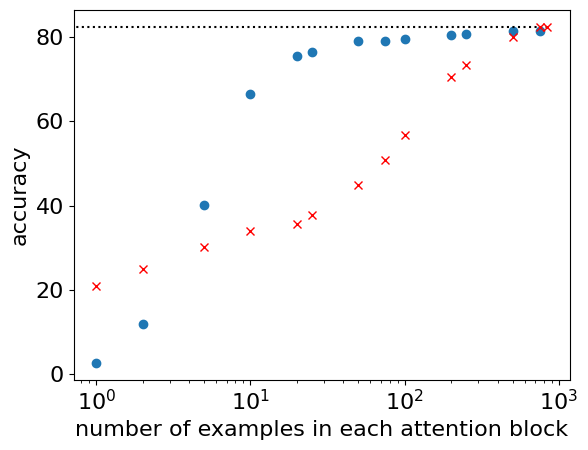

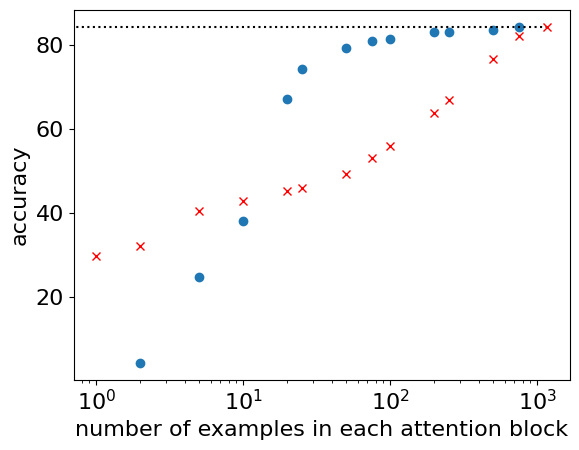

5


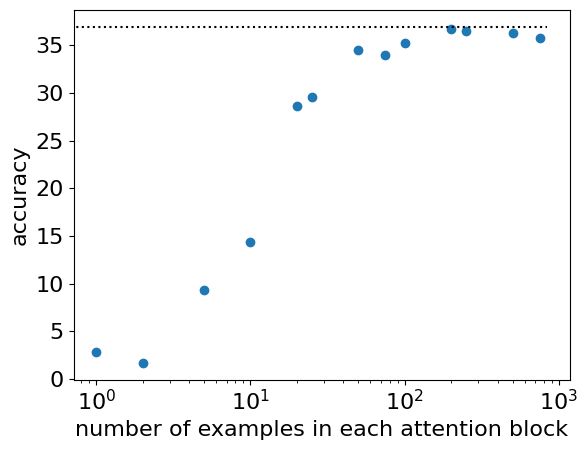

'\nmax_n = max(list(trec[model].keys()))\n\nplot_attention_blocked([\n    #(\'nlu\', nlu[model]),\n    #(\'trec\', trec[model]),\n    #(\'Normal attention\', banking[model]),\n    (\'Blocked attention\', trec_block[model])\n    #(\'clinic\', clinic[model]),\n    #(\'trecfine\', trecfine[model])\n    ], (trec[model][max_n][0], max_n), f"{model} run on trec")\n\nplot_lines(\n    [\n            (\'Blocked attention\', banking_block[model]),\n            ("normal", banking[model])\n\n    ]\n)\n\n\nmax_n = max(list(nlu[model].keys()))\n\nplot_attention_blocked([\n    #(\'nlu\', nlu[model]),\n    #(\'trec\', trec[model]),\n    #(\'Normal attention\', banking[model]),\n    (\'Blocked attention\', nlu_block[model])\n    #(\'clinic\', clinic[model]),\n    #(\'trecfine\', trecfine[model])\n    ], (nlu[model][max_n][0], max_n), f"{model} run on nlu")\n\nprint([(dp, banking_block[\'32k\'][dp][0]) for dp in banking_block[\'32k\'].keys()])\nprint([(dp, banking[\'32k\'][dp][0]) for dp in banking[\'32

In [51]:
#check data is all there!
model = '32k'
"""
for model in ['llama', '32k', '80k']:
    plot_lines([
        ('NLU', nlu_cheating[model]),
        #('trec', trec_cheating[model]),
        ('Banking77', banking_cheating[model]),
        ('Clinic150', clinic_cheating[model]),
        ('trecfine', trecfine_cheating[model])
        ], f"{model} test-on-train", save=f"placeholder-figs/cheating/{model}.png")
"""

max_n = max(list(banking[model].keys()))
low = 5
plot_attention_blocked([
    #('nlu', nlu[model]),
    #('trec', trec[model]),
    #('Normal attention', banking[model]),
    ('Blocked attention', banking_block[model])
    #('clinic', clinic[model]),
    #('trecfine', trecfine[model])
    ], (banking[model][max_n][0], max_n), banking[model],  save=f"placeholder-figs/banking-{model}-block.pdf")
#  (banking[model][low][0], low),


max_n = max(list(clinic[model].keys()))
low = 5
plot_attention_blocked([
    #('nlu', nlu[model]),
    #('trec', trec[model]),
    #('Normal attention', banking[model]),
    ('Blocked attention', clinic_block[model])
    #('clinic', clinic[model]),
    #('trecfine', trecfine[model])
    ], (clinic[model][max_n][0], max_n), clinic[model],  save=f"placeholder-figs/clinic-{model}-block.pdf")
#  (banking[model][low][0], low),
max_n = max(list(banking_sorted[model].keys()))
low = 5 #min(list(banking_block_sorted[model].keys()))
print(low)
plot_attention_blocked([
    #('nlu', nlu[model]),
    #('trec', trec[model]),
    #('Normal attention', banking[model]),
    ('Blocked attention', banking_block_sorted[model])
    #('clinic', clinic[model]),
    #('trecfine', trecfine[model])
    ], (banking_sorted[model][max_n][0], max_n), None, None, save=f"placeholder-figs/banking-{model}-block-sorted.pdf")


# (banking_block_sorted[model][low][0], low)
"""





max_n = max(list(clinic[model].keys()))

plot_attention_blocked([
    #('nlu', nlu[model]),
    #('trec', trec[model]),
    #('Normal attention', banking[model]),
    ('Blocked attention', clinic_block[model])
    #('clinic', clinic[model]),
    #('trecfine', trecfine[model])
    ], (clinic[model][max_n][0], max_n), f"{model} run on clinic")
print(clinic_block[model])

"""
"""
max_n = max(list(trec[model].keys()))

plot_attention_blocked([
    #('nlu', nlu[model]),
    #('trec', trec[model]),
    #('Normal attention', banking[model]),
    ('Blocked attention', trec_block[model])
    #('clinic', clinic[model]),
    #('trecfine', trecfine[model])
    ], (trec[model][max_n][0], max_n), f"{model} run on trec")

plot_lines(
    [
            ('Blocked attention', banking_block[model]),
            ("normal", banking[model])

    ]
)


max_n = max(list(nlu[model].keys()))

plot_attention_blocked([
    #('nlu', nlu[model]),
    #('trec', trec[model]),
    #('Normal attention', banking[model]),
    ('Blocked attention', nlu_block[model])
    #('clinic', clinic[model]),
    #('trecfine', trecfine[model])
    ], (nlu[model][max_n][0], max_n), f"{model} run on nlu")

print([(dp, banking_block['32k'][dp][0]) for dp in banking_block['32k'].keys()])
print([(dp, banking['32k'][dp][0]) for dp in banking['32k'].keys()])
"""


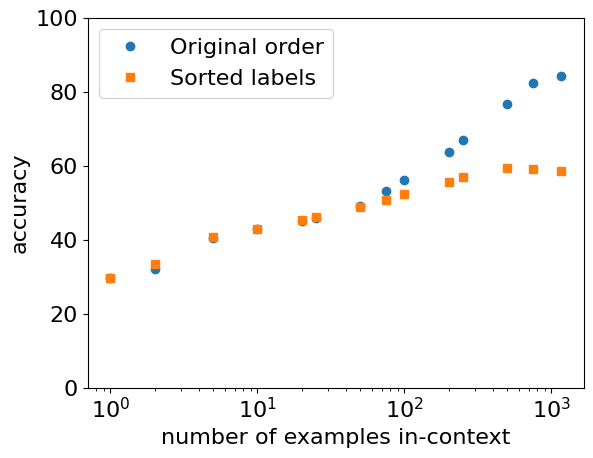

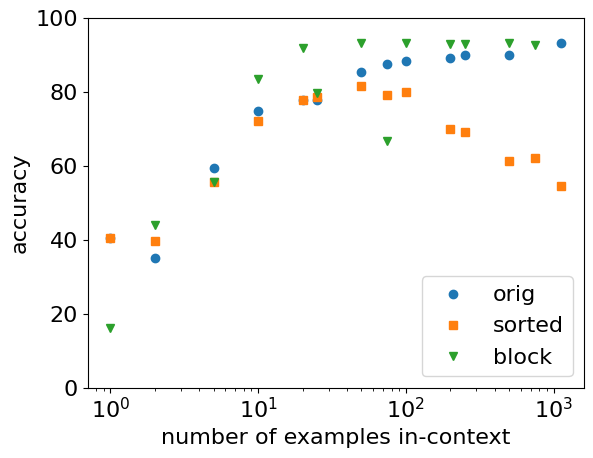

dict_keys([1.0, 2.0, 100.0, 5.0, 200.0, 10.0, 75.0, 750.0, 1169.0, 50.0, 20.0, 500.0, 25.0, 250.0])
25.720000000000013



In [49]:
model = "32k"
plot_lines([
    ("Original order", clinic[model]),
    ("Sorted labels", clinic_sorted[model]),
    #("block", clinic_block[model])
], save="placeholder-figs/sorted-clinic-32k.pdf")

plot_lines([
    ("orig", trec[model]),
    ("sorted", trec_sorted[model]),
    ("block", trec_block[model])
])

print(clinic[model].keys())
print(clinic[model][1169][0] - clinic_sorted[model][1169][0])

print()

In [20]:

# cheating
model = "80k"

for model in ['llama', '32k', '80k']:
    keys = [1, 5, 10, 25, 50, 100] if model == "llama" else [1, 5, 10, 25, 50, 100, 200, 250] #sorted([k for k in banking_cheating[model].keys() if k in clinic_cheating[model].keys()]) # and k in nlu_cheating[model].keys()])

    b_c = [(banking_cheating[model][key][0] + clinic_cheating[model][key][0]) / 2 for key in keys]

    """
    if model in nlu_cheating:
        keys = sorted([k for k in keys if k in nlu_cheating[model].keys()])

        b_c = [(banking_cheating[model][key][0] + clinic_cheating[model][key][0] + nlu_cheating[model][key][0]) / 3 for key in keys]
    else:
        
    """
    print(keys)
    print(b_c)
#plt.bar(keys, b_c)
#plt.xscale('log')
#plt.show()


[1, 5, 10, 25, 50, 100]
[100.0, 93.0, 96.5, 97.0, 98.6, 97.95]
[1, 5, 10, 25, 50, 100, 200, 250]
[80.0, 95.0, 97.0, 96.6, 98.4, 98.5, 98.475, 98.9]
[1, 5, 10, 25, 50, 100, 200, 250]
[90.0, 94.0, 95.0, 98.19999999999999, 98.5, 98.3, 97.95, 97.92000000000002]


In [21]:
nlu['llama']
from scipy.stats import ttest_ind


def calculate_saturation_point(data):
    options = sorted([int(i) for i in data.keys()])
    print(options)
    found_saturation=False
    for i in range(0, len(options) - 1):
        # looking for first p-value > 0.05 
        stat_difs = 0
        for j in range(i+1, len(options)):
            #print(f"comparing data points {options[i]}={data[options[i]][0]} and {options[j]}={data[options[j]][0]}")
            if (cur_p := ttest_ind(a=data[options[i]][1], b=data[options[j]][1]).pvalue) < 0.05:
                #print(f"Statistically significant difference between {options[i]} and {options[j]} samples (p={cur_p}), moving on")
                stat_difs += 1
                if stat_difs >= 1:
                    break
            if j == len(options) - 1:            
                found_saturation = True
        if found_saturation:
            print(f"SATURATION POINT LOCATED! No significant difference between {options[i]} and any number of examples past that")
            return options[i]

def calculate_saturation_point_microavg_percentile(data):
    sat_points = []
    options = sorted([int(i) for i in data.keys()])
    
    for seed in range(len(data[0][1])):
        # for each random seed:
        found_sat = False
        perfs = sorted([int(data[i][1][seed]) for i in data.keys()])
        num_to_beat = 0.95 * max(perfs)
    
        for i in range(0, len(options)):
            if data[options[i]][1][seed] >= num_to_beat:
                sat_points.append(options[i])
                found_sat = True


In [22]:

def calculate_saturation_point_percentile(data, accuracy=False):
    if accuracy:
        metric = 0
    else:
        metric = 2
    perfs = sorted([int(data[i][metric]) for i in data.keys()])
    num_to_beat = 0.95 * max(perfs)
    options = sorted([int(i) for i in data.keys()])
    for i in range(0, len(options)):
        if data[options[i]][metric] >= num_to_beat:
            return options[i]

In [23]:
from scipy.stats import ttest_ind

def short_context_regime(short_model, long_model):
    options = sorted([int(i) for i in short_model.keys()])
    print(options)
    for i in range(0, len(options)):
        if options[i] not in long_model:
            continue
        # looking for first p-value > 0.05 
        stat_difs = 0
        if (cur_p := ttest_ind(a=short_model[options[i]][1], b=long_model[options[i]][1]).pvalue) < 0.05:
            print(f"Statistically significant difference at {options[i]} samples (p={cur_p}), moving on")
            stat_difs += 1
            
    print(stat_difs / len(options))

In [24]:
banking['llama'].keys()

dict_keys([32.0, 1.0, 64.0, 100.0, 5.0, 10.0, 75.0, 50.0, 25.0])

Statisticall significant difference at 50 samples
Statisticall significant difference at 75 samples
Statisticall significant difference at 100 samples
Statisticall significant difference at 75 samples
[[0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]


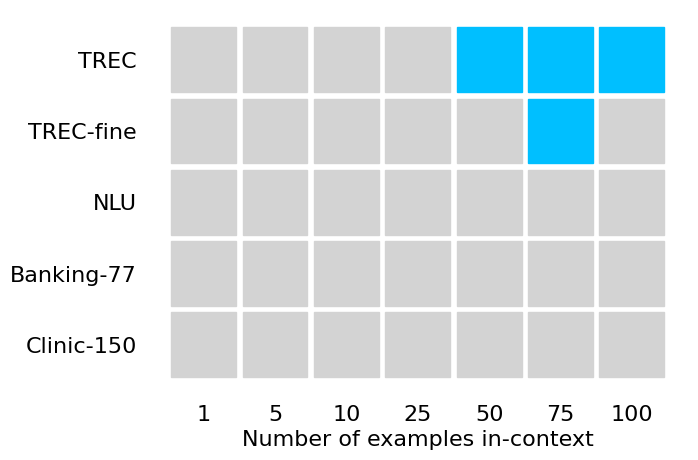

In [46]:
datasets = [trec, trecfine, nlu, banking, clinic]
import numpy as np
plt.rcParams.update({'font.size': 16})

model = '80k'
comp_points = [1,5,10,25,50,75,100]
squares = [] #[[[0] * len(comp_points)] for i in range(len(datasets))]
for i, dataset in enumerate(datasets):
    this_dataset = []
    for j, comp_p in enumerate(comp_points):
        if comp_p not in dataset['llama']:
            print(f"missing {comp_p} from keyset {dataset['llama'].keys()}")
            this_dataset.append(2)
            continue
        cur_p = ttest_ind(a=dataset['llama'][comp_p][1], b=dataset[model][comp_p][1]).pvalue
        if cur_p < 0.05:
            print(f"Statisticall significant difference at {comp_p} samples")
            this_dataset.append(-1 if (dataset['llama'][comp_p][0] - dataset[model][comp_p][0]) > 0 else 1)
        else:
            this_dataset.append(0)
    squares.append(this_dataset)
print(squares)

"""if (cur_p := ttest_ind(a=short_model[options[i]][1], b=long_model[options[i]][1]).pvalue) < 0.05:
            print(f"Statistically significant difference at {options[i]} samples (p={cur_p}), moving on")
            stat_difs += 1
            
short_context_regime(dataset['llama'], dataset['32k'])
short_context_regime(dataset['llama'], dataset['80k'])"""

# Example 2D list
data = squares
data.reverse()

# Convert the 2D list to a numpy array for easier manipulation
data_array = np.array(data)

# Create a plot
plt.figure(figsize=(len(comp_points), len(datasets)))

colors = {-1: "tomato", 1:"deepskyblue", 2:"white", 0:"lightgrey"}

# Define the size of each square
square_size = 1.0
spacing = 0.1 
# Plot each square with its corresponding color based on the value in the 2D list
for i in range(data_array.shape[0]):
    for j in range(data_array.shape[1]):
        # Add a little space between each square
        x = j * (square_size + spacing)
        y = i * (square_size + spacing)
        plt.fill([x, x + square_size, x + square_size, x], [y, y, y + square_size, y + square_size],
                 color=colors[data_array[i, j]])

y_values = ["TREC", "TREC-fine", "NLU", "Banking-77", "Clinic-150"]
y_values.reverse()
plt.xticks(np.arange(len(comp_points)) * (square_size + spacing) + 0.5 * square_size, comp_points)
plt.yticks(np.arange(len(y_values)) * (square_size + spacing) + 0.5 * square_size, y_values)
#plt.yticks(np.arange(len(y_values)), y_values)
# Adding labels and title

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

plt.xlabel('Number of examples in-context')

plt.savefig(f"placeholder-figs/{model}-shortcontext.pdf", bbox_inches='tight')
# Show the plot
plt.show()


In [26]:
trecfine['llama'].keys()

dict_keys([1.0, 2.0, 131.0, 100.0, 5.0, 10.0, 75.0, 50.0, 20.0, 25.0])

In [27]:
# saturation with half label space
datasets = [nlu, trec, trecfine, banking, clinic, tacred]
models = ["llama", "32k", "80k", "mistral"]
print("\\begin{table}[t]\n\\label{saturation-table}\n\\begin{center}\n\\begin{tabular}{lllll}\n\\toprule\n\\multicolumn{1}{c}{\\bf Dataset}  &\\multicolumn{1}{c}{\\bf Llama2}" + \
    "  &\\multicolumn{1}{c}{\\bf Llama2-32k}  &\\multicolumn{1}{c}{\\bf Llama2-80k}  & {\\bf Mistral} \\\\ \n\\midrule \n")
def saturation_all_models(dataset, models, sat_func, half_datasets=None):
    results = ""
    for model in models:
        if model not in dataset:
            results += "& - "
        else:
            sat_result = sat_func(dataset[model], accuracy = True)
            if sat_result == max(list(dataset[model].keys())):
                pass #sat_result = "n/a"
            half_results = [(sat_func(d[model], accuracy = True) *100) /int(max(list(d[model].keys()))) for d in half_datasets if model in d]
            half_aggregate = round(sum(half_results) / len(half_datasets), 2)
            results += f"& {round(sat_result*100/int(max(list(dataset[model].keys()))),2)} / {half_aggregate} "
    return results


print(f"\\trec {saturation_all_models(trec, models, calculate_saturation_point_percentile, [trec_half_12, trec_half_13, trec_half_14])} \\\\")
print(f"\\trecfine {saturation_all_models(trecfine, models, calculate_saturation_point_percentile, [trecfine_half_12, trecfine_half_13, trecfine_half_14])} \\\\")
print(f"\\nlu {saturation_all_models(nlu, models, calculate_saturation_point_percentile, [nlu_half_12, nlu_half_13, nlu_half_14])} \\\\")
print(f"\\banking {saturation_all_models(banking, models, calculate_saturation_point_percentile, [banking_half_12, banking_half_13, banking_half_14])} \\\\")
print(f"\\clinic {saturation_all_models(clinic, models, calculate_saturation_point_percentile, [clinic_half_12, clinic_half_13, clinic_half_14])} \\\\")

"""
print(f"all {saturation_all_models(banking, models, calculate_saturation_point_percentile)} \\\\")
print(f"12 {saturation_all_models(banking_half_12, models, calculate_saturation_point_percentile)} \\\\")
print(f"13 {saturation_all_models(banking_half_13, models, calculate_saturation_point_percentile)} \\\\")
print(f"14 {saturation_all_models(banking_half_14, models, calculate_saturation_point_percentile)} \\\\")

NLU & & 78.04  & 86.92 \\
TREC & 6 & 55.08 & 89.80 \\
TRECFINE & & 49.92 & 76.88 \\
BANKING77 & 77 & 52.72 & 87.96 \ \\
CLINIC150 & 151 & 60.92 & 89.28  \\
TacRED & & &  \\"""
print("\\bottomrule\n\\end{tabular}\n\\end{center}\n\\caption{" + \
    "We measure the saturation point as the point at which the model reaches 95\% of its maximum accuracy on the dataset. A ``n/a'' in a row indicates that the maximum performance is achieved at the maximum number of examples.}\n\\end{table}")

\begin{table}[t]
\label{saturation-table}
\begin{center}
\begin{tabular}{lllll}
\toprule
\multicolumn{1}{c}{\bf Dataset}  &\multicolumn{1}{c}{\bf Llama2}  &\multicolumn{1}{c}{\bf Llama2-32k}  &\multicolumn{1}{c}{\bf Llama2-80k}  & {\bf Mistral} \\ 
\midrule 

\trec & 14.29 / 24.69 & 8.86 / 1.77 & 3.75 / 1.71 & 4.43 / 6.0  \\
\trecfine & 57.25 / 80.71 & 23.67 / 27.9 & 25.0 / 32.38 & 45.83 / 33.33  \\
\nlu & 61.73 / 80.71 & 38.2 / 17.21 & 25.0 / 26.67 & 19.1 / 36.67  \\
\banking & 100.0 / 88.0 & 59.67 / 37.91 & 42.86 / 28.57 & 58.14 / 35.56  \\
\clinic & 100.0 / 64.04 & 64.16 / 35.14 & 50.0 / 22.86 & 61.88 / 56.67  \\
\bottomrule
\end{tabular}
\end{center}
\caption{We measure the saturation point as the point at which the model reaches 95\% of its maximum accuracy on the dataset. A ``n/a'' in a row indicates that the maximum performance is achieved at the maximum number of examples.}
\end{table}


In [28]:
# saturation no half label space
datasets = [nlu, trec, trecfine, banking, clinic, tacred]
models = ["llama", "32k", "80k", "mistral"]
print("\\begin{table}[t]\n\\label{saturation-table}\n\\begin{center}\n\\begin{tabular}{lllll}\n\\toprule\n\\multicolumn{1}{c}{\\bf Dataset}  &\\multicolumn{1}{c}{\\bf Llama2}" + \
    "  &\\multicolumn{1}{c}{\\bf Llama2-32k}  &\\multicolumn{1}{c}{\\bf Llama2-80k}  & {\\bf Mistral} \\\\ \n\\midrule \n")
def saturation_all_models(dataset, models, sat_func, half_datasets=None):
    results = ""
    for model in models:
        if model not in dataset:
            results += "& MISSING "
        else:
            sat_result = sat_func(dataset[model], accuracy = True)
            if sat_result == max(list(dataset[model].keys())):
                sat_result = "-"
            results += f"& {sat_result} ({int(max(list(dataset[model].keys())))}) "
    return results


print(f"\\trec {saturation_all_models(trec, models, calculate_saturation_point_percentile, [trec_half_12, trec_half_13, trec_half_14])} \\\\")
print(f"\\trecfine {saturation_all_models(trecfine, models, calculate_saturation_point_percentile, [trecfine_half_12, trecfine_half_13, trecfine_half_14])} \\\\")
print(f"\\nlu {saturation_all_models(nlu, models, calculate_saturation_point_percentile, [nlu_half_12, nlu_half_13, nlu_half_14])} \\\\")
print(f"\\banking {saturation_all_models(banking, models, calculate_saturation_point_percentile, [banking_half_12, banking_half_13, banking_half_14])} \\\\")
print(f"\\clinic {saturation_all_models(clinic, models, calculate_saturation_point_percentile, [clinic_half_12, clinic_half_13, clinic_half_14])} \\\\")

"""
print(f"all {saturation_all_models(banking, models, calculate_saturation_point_percentile)} \\\\")
print(f"12 {saturation_all_models(banking_half_12, models, calculate_saturation_point_percentile)} \\\\")
print(f"13 {saturation_all_models(banking_half_13, models, calculate_saturation_point_percentile)} \\\\")
print(f"14 {saturation_all_models(banking_half_14, models, calculate_saturation_point_percentile)} \\\\")

NLU & & 78.04  & 86.92 \\
TREC & 6 & 55.08 & 89.80 \\
TRECFINE & & 49.92 & 76.88 \\
BANKING77 & 77 & 52.72 & 87.96 \ \\
CLINIC150 & 151 & 60.92 & 89.28  \\
TacRED & & &  \\"""
print("\\bottomrule\n\\end{tabular}\n\\end{center}\n\\caption{" + \
    "We measure the saturation point as the point at which the model reaches 95\% of its maximum accuracy on the dataset. A ``n/a'' in a row indicates that the maximum performance is achieved at the maximum number of examples.}\n\\end{table}")

\begin{table}[t]
\label{saturation-table}
\begin{center}
\begin{tabular}{lllll}
\toprule
\multicolumn{1}{c}{\bf Dataset}  &\multicolumn{1}{c}{\bf Llama2}  &\multicolumn{1}{c}{\bf Llama2-32k}  &\multicolumn{1}{c}{\bf Llama2-80k}  & {\bf Mistral} \\ 
\midrule 

\trec & 20 (140) & 100 (1129) & 75 (2000) & 50 (1129)  \\
\trecfine & 75 (131) & 250 (1056) & 500 (2000) & 500 (1091)  \\
\nlu & 100 (162) & 500 (1309) & 500 (2000) & 250 (1309)  \\
\banking & - (100) & 500 (838) & 750 (1750) & 500 (860)  \\
\clinic & - (145) & 750 (1169) & 1000 (2000) & 750 (1212)  \\
\bottomrule
\end{tabular}
\end{center}
\caption{We measure the saturation point as the point at which the model reaches 95\% of its maximum accuracy on the dataset. A ``n/a'' in a row indicates that the maximum performance is achieved at the maximum number of examples.}
\end{table}


[1, 2, 5, 10, 20, 25, 50, 75, 100, 200, 250, 500, 1000, 1250, 1500, 1750, 2000]
SATURATION POINT LOCATED! No significant difference between 500 and any number of examples past that


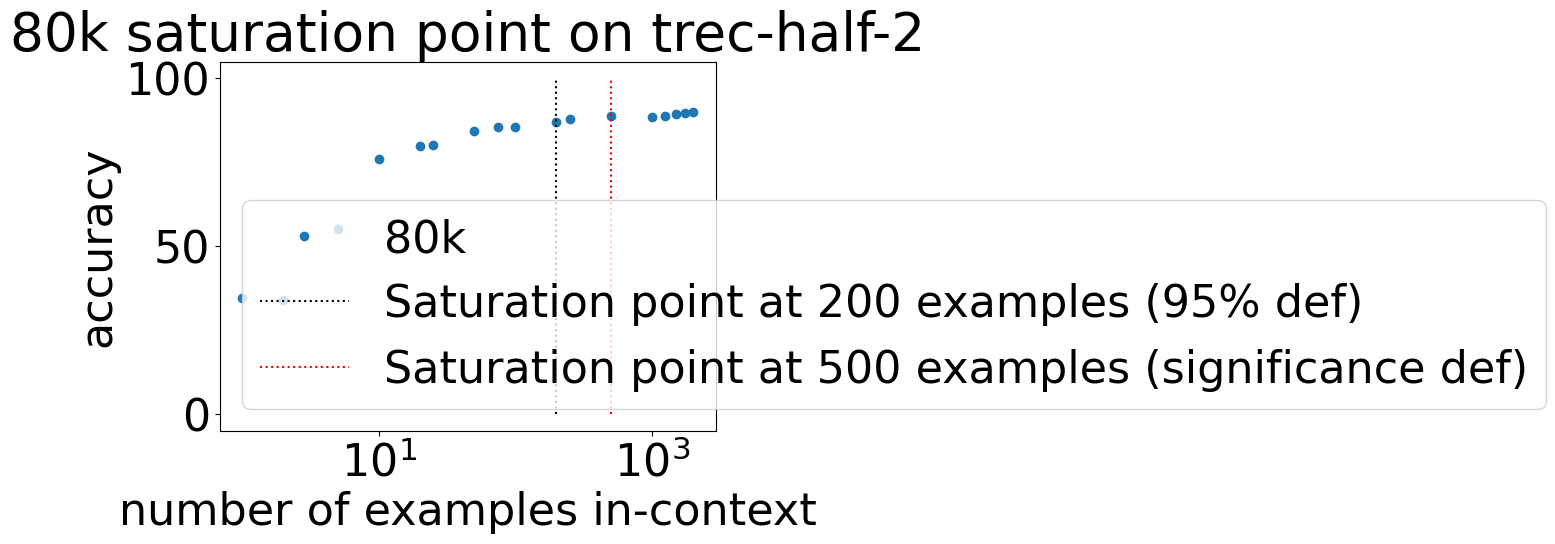

In [29]:
dataset = trec
model = '80k'


sat = calculate_saturation_point_percentile(dataset[model])
sat2 = calculate_saturation_point(dataset[model])
plot_saturation([
    #('4k (base model)', dataset['llama']),
    (f'{model}', dataset[model]),
    #('Mistral (8k)', dataset['mistral']),
    #('Mistral (32k Instruct)', dataset['mistral-instruct'])
    ], sat, sat2, f"{model} saturation point on trec-half-2") #, save="placeholder-figs/banking-perf.png")


dict_keys([])


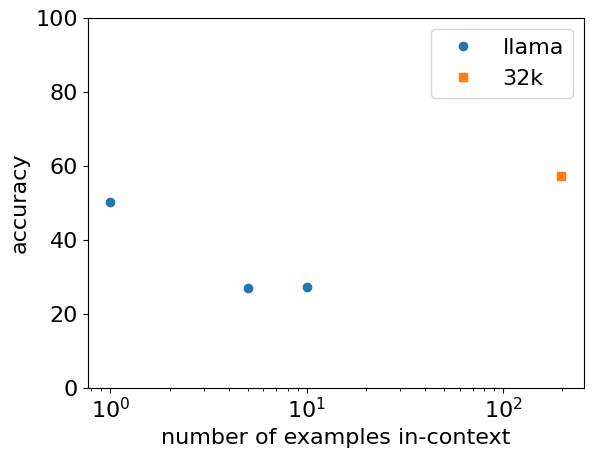

In [30]:
# think about tacred
print(tacred_retrieval.keys())
plot_lines([
    ("llama", tacred['llama']),
    ("32k", tacred['32k']),
    #("mistral", tacred['mistral-instruct']),
    #("80k", tacred['80k'])
])

dict_keys(['llama', '32k', '80k', 'mistral-old', 'mistral', 'finetuning'])


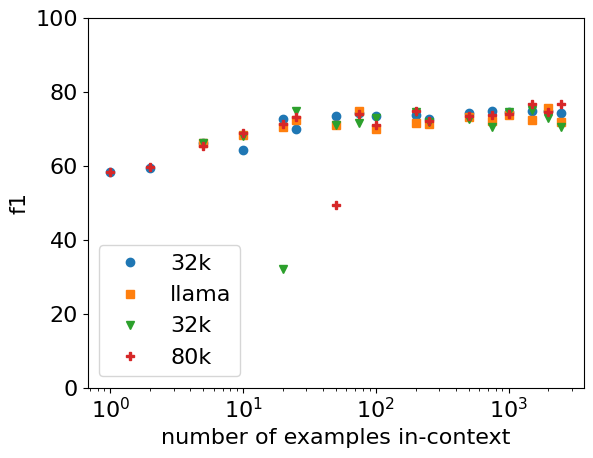

In [31]:
# f1 testing

# think about tacred
print(nlu.keys())
model = '80k'
plot_lines([
    ("32k", nlu_retrieval[model]),
    ("llama", nlu_retrieval_window_shuffle_16[model]),
    ("32k", nlu_retrieval_window_shuffle_17[model]),
    ("80k", nlu_retrieval_window_shuffle_18[model])
], f1=True)

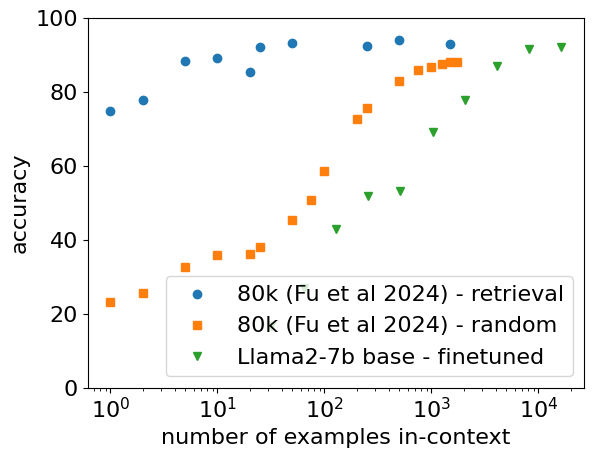

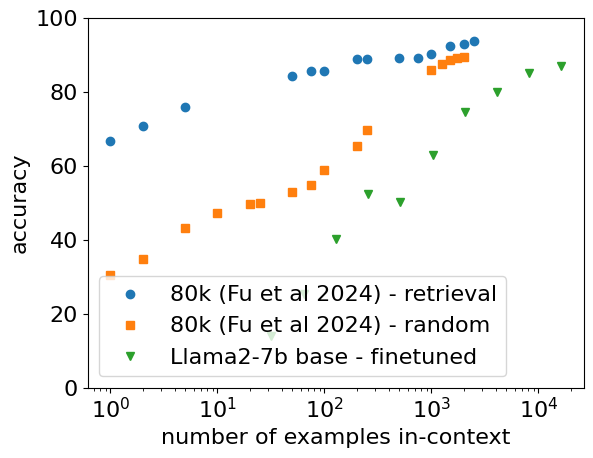

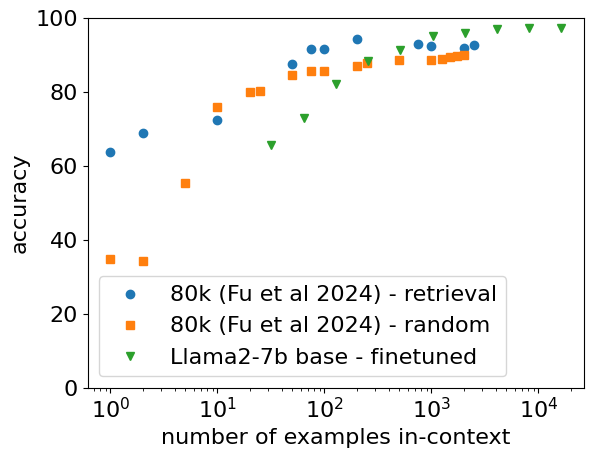

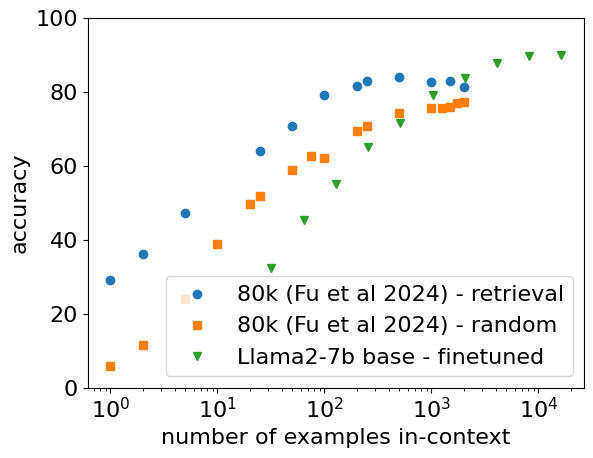

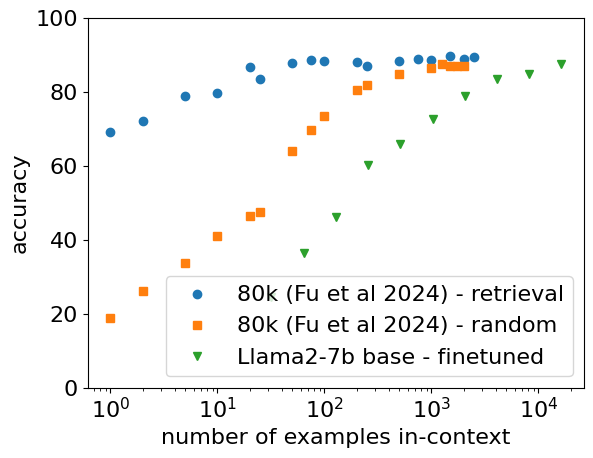

In [15]:
model = 'llama'
dataset = banking_retrieval
dataset2 = banking
use_f1 = False
plot_lines([
    #('4k (base model) - retrieval', dataset['llama']),
    #('32k (TogetherAI) - retrieval', dataset['32k']),
    ('80k (Fu et al 2024) - retrieval', dataset['80k']),
    #('4k (base model)', dataset2['llama']),
    #('32k (TogetherAI)', dataset2['32k']),
    ('80k (Fu et al 2024) - random', dataset2['80k']),
    ('Llama2-7b base - finetuned', dataset2['finetuning'])
    #('Mistral (32k)', dataset['mistral'])
    ], f"Llama-2-7b variants on Banking", f1=use_f1,save="placeholder-figs/banking-all-comp.png")

dataset = clinic_retrieval
dataset2 = clinic
plot_lines([
    #('4k (base model) - retrieval', dataset['llama']),
    #('32k (TogetherAI) - retrieval', dataset['32k']),
    ('80k (Fu et al 2024) - retrieval', dataset['80k']),
    #('4k (base model)', dataset2['llama']),
    #('32k (TogetherAI)', dataset2['32k']),
    ('80k (Fu et al 2024) - random', dataset2['80k']),
    ('Llama2-7b base - finetuned', dataset2['finetuning'])
    #('Mistral (32k)', dataset['mistral'])
    ], f"Llama-2-7b variants on Clinic",f1=use_f1, save="placeholder-figs/clinic-all-comp.png")


dataset = trec_retrieval
dataset2 = trec
plot_lines([
    #('4k (base model) - retrieval', dataset['llama']),
    #('32k (TogetherAI) - retrieval', dataset['32k']),
    ('80k (Fu et al 2024) - retrieval', dataset['80k']),
    #('4k (base model)', dataset2['llama']),
    #('32k (TogetherAI)', dataset2['32k']),
    ('80k (Fu et al 2024) - random', dataset2['80k']),
    ('Llama2-7b base - finetuned', dataset2['finetuning'])
    #('Mistral (32k)', dataset['mistral'])
    ], f"Llama-2-7b variants on Trec",f1=use_f1, save="placeholder-figs/trec-all-comp.png")



dataset = trecfine_retrieval
dataset2 = trecfine
plot_lines([
    #('4k (base model) - retrieval', dataset['llama']),
    #('32k (TogetherAI) - retrieval', dataset['32k']),
    ('80k (Fu et al 2024) - retrieval', dataset['80k']),
    #('4k (base model)', dataset2['llama']),
    #('32k (TogetherAI)', dataset2['32k']),
    ('80k (Fu et al 2024) - random', dataset2['80k']),
    ('Llama2-7b base - finetuned', dataset2['finetuning'])
    #('Mistral (32k)', dataset['mistral'])
    ], f"Llama-2-7b variants on Trecfine", f1=use_f1, save="placeholder-figs/trecfine-all-comp.png")


dataset = nlu_retrieval
dataset2 = nlu
plot_lines([
    #('4k (base model) - retrieval', dataset['llama']),
    #('32k (TogetherAI) - retrieval', dataset['32k']),
    ('80k (Fu et al 2024) - retrieval', dataset['80k']),
    #('4k (base model)', dataset2['llama']),
    #('32k (TogetherAI)', dataset2['32k']),
    ('80k (Fu et al 2024) - random', dataset2['80k']),
    ('Llama2-7b base - finetuned', dataset2['finetuning'])
    #('Mistral (32k)', dataset['mistral'])
    ], f"Llama-2-7b variants on NLU", f1=use_f1,save="placeholder-figs/nlu-all-comp.png")

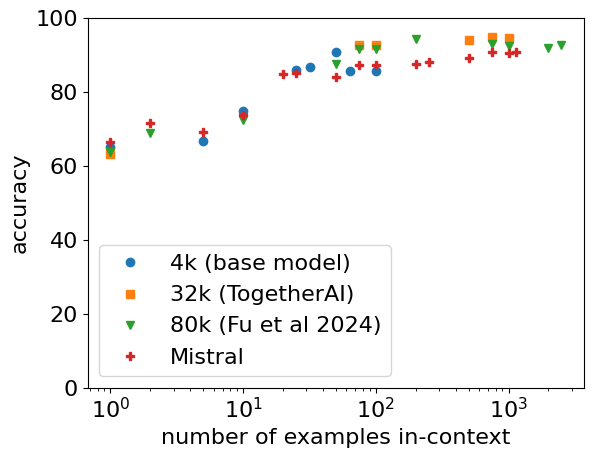

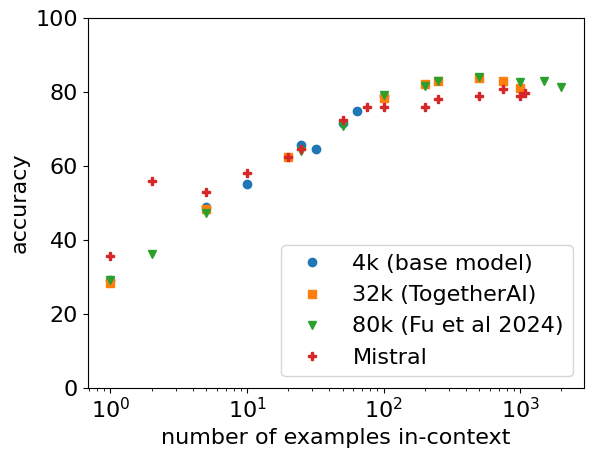

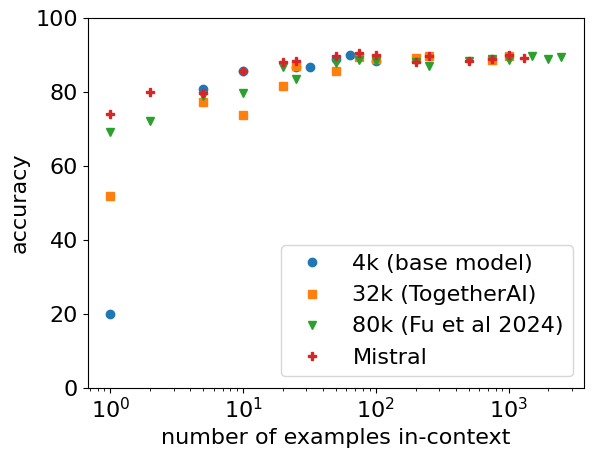

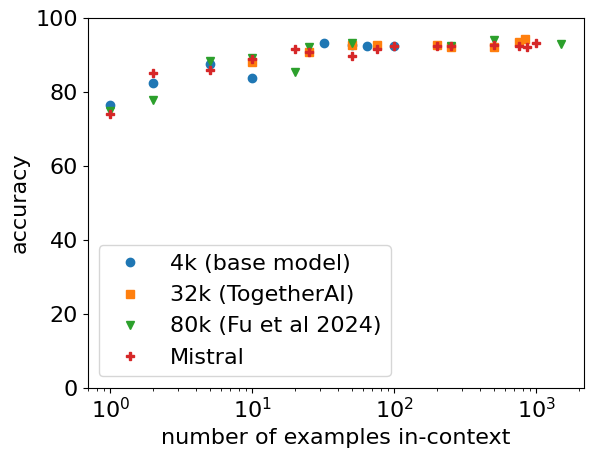

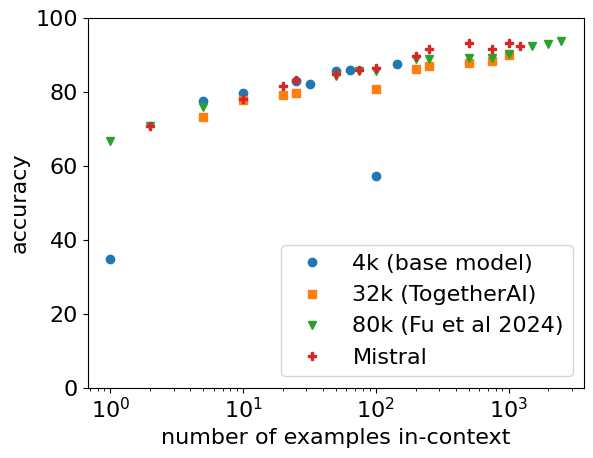

In [33]:
model = 'llama'
dataset = banking_retrieval
dataset2 = banking
use_f1 = False

datapool = [
    ("trec", trec_retrieval),
    ("trecfine", trecfine_retrieval),
    ("nlu", nlu_retrieval),
    ("banking", banking_retrieval),
    ("clinic", clinic_retrieval)
]

for (datasetname, dataset) in datapool:
    plot_lines([
        ('4k (base model)', dataset['llama']),
        ('32k (TogetherAI)', dataset['32k']),
        ('80k (Fu et al 2024)', dataset['80k']),
        ('Mistral', dataset['mistral']),

        ], f"Llama-2-7b variants with retrieval", f1=use_f1,save=f"new-figs/retrieval-{datasetname}.png")


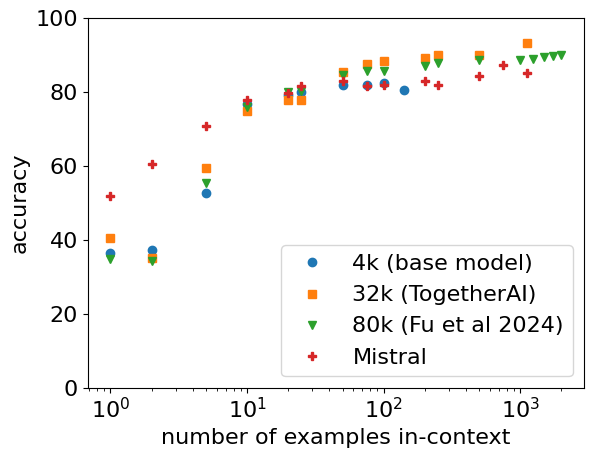

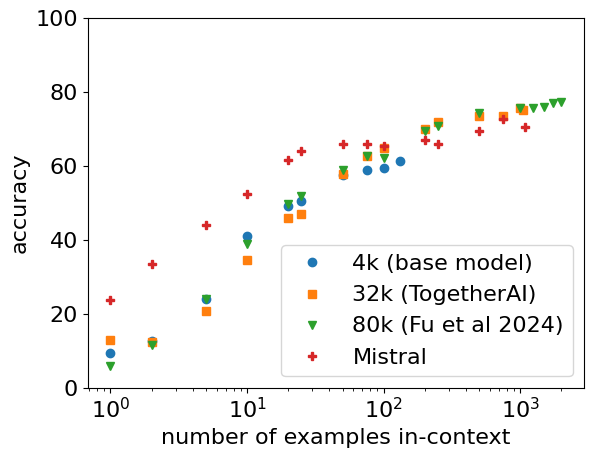

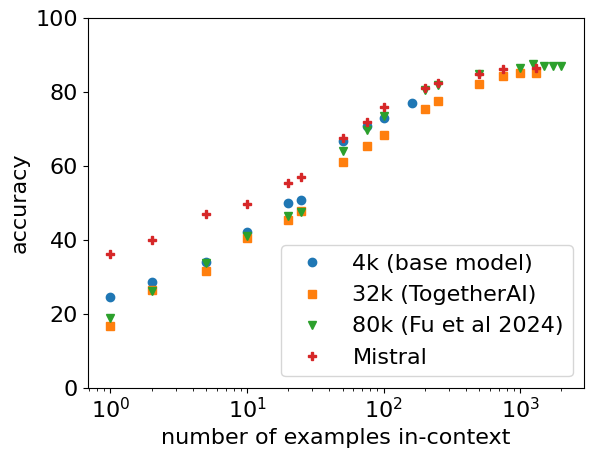

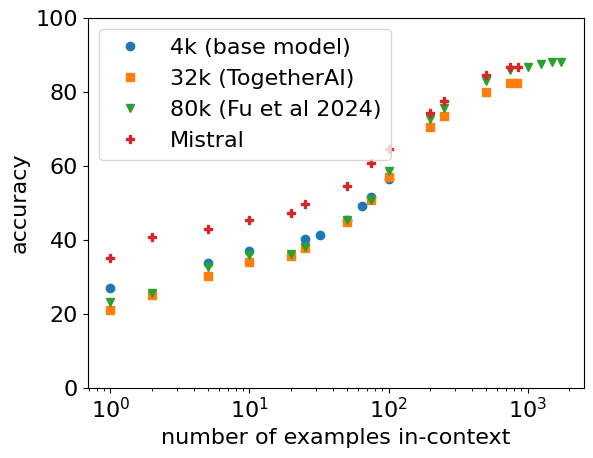

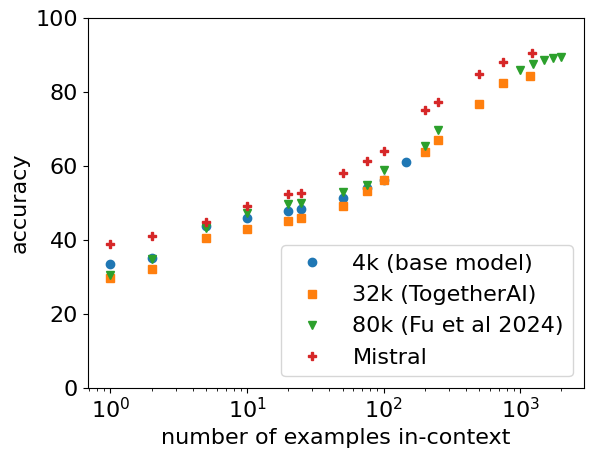

In [34]:
use_f1 = False

datapool = [
    ("trec", trec),
    ("trecfine", trecfine),
    ("nlu", nlu),
    ("banking", banking),
    ("clinic", clinic)
]

for (datasetname, dataset) in datapool:
    plot_lines([
        ('4k (base model)', dataset['llama']),
        ('32k (TogetherAI)', dataset['32k']),
        ('80k (Fu et al 2024)', dataset['80k']),
        ('Mistral', dataset['mistral']),

        ], f"Llama-2-7b variants with random", f1=use_f1,save=f"new-figs/random-{datasetname}.png")


In [35]:
clinic_retrieval['llama'][1]

(34.8, [34.8], 26.33566385081109, [26.33566385081109])

In [36]:
clinic_retrieval['llama'][100] = (61.6, [61.6], 0, [0])

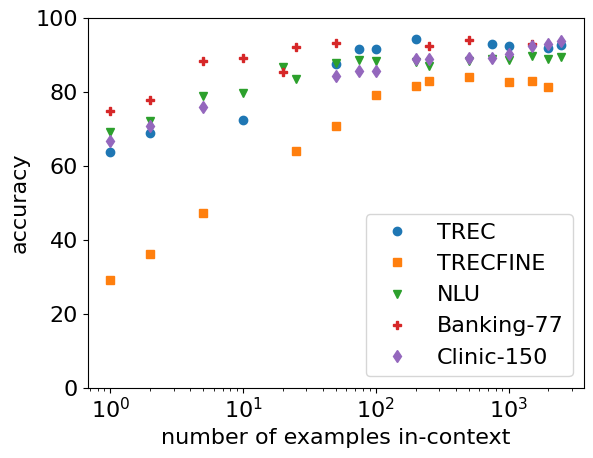

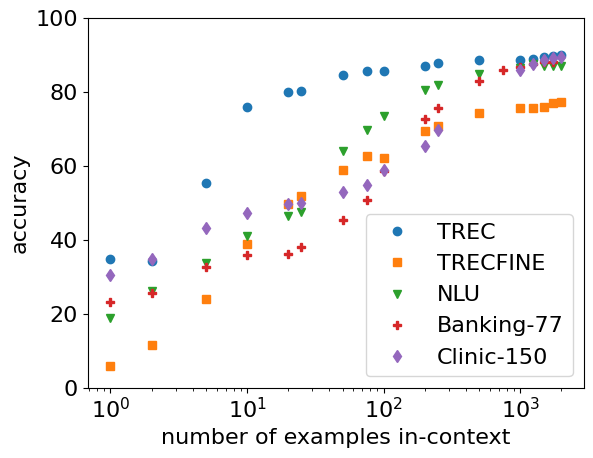

In [37]:
model = '80k'
dataset = banking_retrieval
dataset2 = banking
plot_lines([
    ('TREC', trec_retrieval[model]),
    ('TRECFINE', trecfine_retrieval[model]),
    ('NLU', nlu_retrieval[model]),
    ('Banking-77', banking_retrieval[model]),
    ('Clinic-150', clinic_retrieval[model]),
    ], f"Retrieved demonstrations", save="placeholder-figs/80k-retrieved-all.png")
plot_lines([
    ('TREC', trec[model]),
    ('TRECFINE', trecfine[model]),
    ('NLU', nlu[model]),
    ('Banking-77', banking[model]),
    ('Clinic-150', clinic[model]),
    ], f"Randomly selected demonstrations", save="placeholder-figs/80k-all.png")

In [38]:
# sensitivity to example order 
# todo: need to look at the per-run level, pull % that were flipped by each transformation, then average these
# do with NLU and 80k as an example

def get_files(dir):
    # get list of all files grouped like {n_shots: [runs 0 to 9]}
    import os
    filelist = {}
    for file in os.listdir(dir):
        if file.startswith("nspw=") and file.endswith(".csv"):
            # TODO: does this consider our extra llama files?
            num_shots = int(file.split("_")[0].split("nspw=")[1])
            if num_shots in filelist:
                filelist[num_shots].append(os.path.join(dir,file))
            else:
                filelist[num_shots] = [os.path.join(dir,file)]
    for key in filelist:
        filelist[key] = sorted(filelist[key])
    
    return filelist

def comp_two(origlist, newlist):
    import pandas as pd
    all_results = {}
    for n_shots in origlist:
        this_shot_sum = 0
        if n_shots not in newlist:
            continue
        for i in range(0, len(origlist[n_shots])):
            if i >= len(newlist[n_shots]):
                continue
            orig_file=origlist[n_shots][i]
            new_file=newlist[n_shots][i]
            df_orig = pd.read_csv(orig_file)
            df_new = pd.read_csv(new_file)
            swapcount = (df_orig['outputs'] != df_new['outputs']).sum() / len(df_new['outputs'])
            this_shot_sum += swapcount
        all_results[n_shots] = this_shot_sum / len(origlist[n_shots]) * 100
    return all_results
    
def comp_all(orig, sorts):
    all_results = []
    collation = {}
    for sort in sorts:
        all_results.append(comp_two(get_files(orig), get_files(sort)))
    for key in all_results[0].keys():
        if key not in all_results[1]:
            break
        if key not in all_results[2]:
            break
        collation[key] = sum(result[key] for result in all_results)/len(all_results)
    return collation

datasets = ['trec', 'trecfine', 'nlu', 'banking77', 'clinic150']
dataset_names = ['TREC', 'TREC-fine', 'NLU', 'Banking-77', 'Clinic-150']
model = "yaofu+llama-2-7b-80k" #"togethercomputer+LLaMA-2-7B-32K" #
keyslist = []
valueslist = []
for dataset in datasets: 
    orig = f"/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/{model}/{dataset}"
    ret = f"/data/tir/projects/tir4/users/abertsch/allshot-prompting/colm-final/{model}/{dataset}-retrieval"

    sorts = [orig + i for i in ["-window-shuffle-seed=16", "-window-shuffle-seed=17", "-window-shuffle-seed=18"]]
    ret_sorts = [orig + i for i in ["-window-shuffle-seed=16-retrieval", "-window-shuffle-seed=17-retrieval", "-window-shuffle-seed=18-retrieval"]]

    result = comp_all(orig, sorts)
    keys = sorted(list(result.keys()))[1:]
    values = [result[k] for k in keys]
    keyslist.append(keys)
    valueslist.append(values)
    print(keys)
    print(values)
    



[5, 10, 20, 25, 50, 75, 100, 200, 250, 500, 1000]
[13.920000000000002, 17.386666666666667, 11.08, 12.08, 7.800000000000002, 6.626666666666668, 6.359999999999999, 5.88, 5.226666666666667, 5.533333333333332, 6.0]
[5, 10, 20, 25, 50, 75, 100, 200, 250, 500, 1000]
[19.319999999999997, 24.973333333333333, 20.933333333333334, 20.50666666666667, 18.05333333333333, 14.546666666666667, 15.173333333333332, 14.200000000000001, 12.773333333333335, 11.586666666666668, 10.440000000000001]
[5, 10, 20, 25, 50, 75, 100, 200, 250, 500, 1000, 1500, 1750]
[22.413333333333338, 21.733333333333334, 22.506666666666664, 21.813333333333333, 15.933333333333332, 16.013333333333335, 14.0, 11.08, 10.226666666666667, 9.146666666666667, 7.253333333333333, 7.506666666666667, 7.64]
[5, 10, 20, 25, 50, 75, 100, 200, 250, 500, 750, 1500, 1750]
[14.733333333333333, 14.386666666666665, 17.866666666666664, 16.8, 19.186666666666664, 19.41333333333333, 17.30666666666667, 16.346666666666664, 15.6, 12.013333333333335, 10.200000

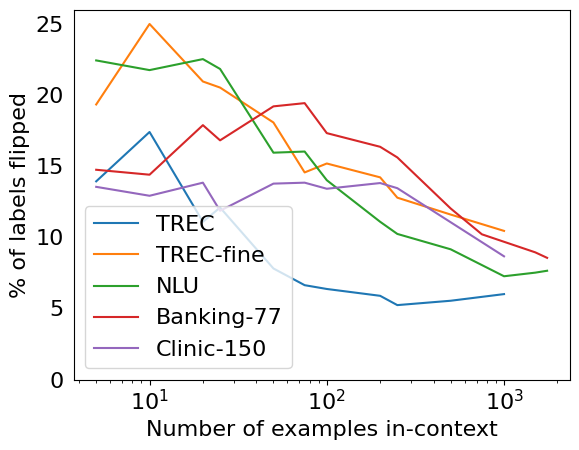

In [48]:

for i in range(len(keyslist)):
    plt.plot(keyslist[i], valueslist[i], label=dataset_names[i])
    
plt.tick_params(left = False) 
plt.xscale('log')
plt.legend()
plt.xlabel("Number of examples in-context")
plt.ylabel("% of labels flipped")
plt.savefig("placeholder-figs/80k-reordering.pdf", bbox_inches="tight")
plt.ylim(bottom=0)
plt.show()

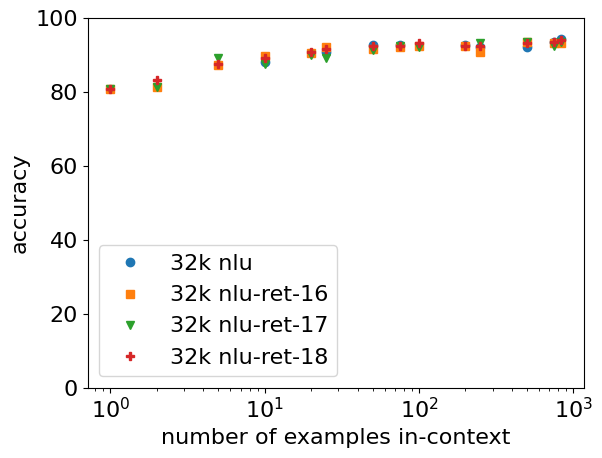

not different
None
not different
None
not different
None


In [40]:
# comparing retrieval with shuffled retrieval


from scipy.stats import ttest_ind


def sig_diff(data1, data2):
    options = sorted([int(i) for i in data1.keys() if i in data2.keys()])
    count = 0
    for i in options:
        if (cur_p := ttest_ind(a=data1[i][1], b=data2[i][1]).pvalue) < 0.05:
            print(f"Statistically significant difference at {i} samples (p={cur_p}), moving on")
        else:
            count += 1
    print(f"{count} not different")

def sig_overall(data1, data2):
    data1 = [v[0] for v in data1.values()]
    data2 = [v[0] for v in data2.values()]
    if (cur_p := ttest_ind(a=data1, b=data2).pvalue) < 0.05:
        print(f"Statistically significant difference (p={cur_p})")
    else:
        print("not different")

model = '32k'
plot_lines([
    (f'{model} nlu', banking_retrieval[model]),
    (f'{model} nlu-ret-16', banking_retrieval_window_shuffle_16[model]),
    (f'{model} nlu-ret-17', banking_retrieval_window_shuffle_17[model]),
    (f'{model} nlu-ret-18', banking_retrieval_window_shuffle_18[model]),
    ], f"{model} nlu runs")



print(sig_overall(trec_retrieval[model], trec_retrieval_window_shuffle_16[model]))
print(sig_overall(trec_retrieval[model], trec_retrieval_window_shuffle_17[model]))
print(sig_overall(trec_retrieval[model], trec_retrieval_window_shuffle_18[model]))

In [41]:
# find biggest difference between retrieval and normal at 1
datasets = [(banking, banking_retrieval),
            (clinic, clinic_retrieval),
            (trec, trec_retrieval),
            (trecfine, trecfine_retrieval),
            (nlu, nlu_retrieval)]

model = '80k'
for (normal, retrieval) in datasets:
    print(normal[model][1][0] - retrieval[model][1][0])
    max_key = min(max(normal[model].keys()), max(retrieval[model].keys()))
    print(max_key)
    print(normal[model][max_key][0] - retrieval[model][max_key][0])

-51.48
1500.0
-4.8799999999999955
-36.35999999999997
2000.0
-3.5999999999999943
-28.88000000000001
2000.0
-1.7600000000000193
-23.439999999999994
2000.0
-4.159999999999982
-50.480000000000004
2000.0
-2.0400000000000063


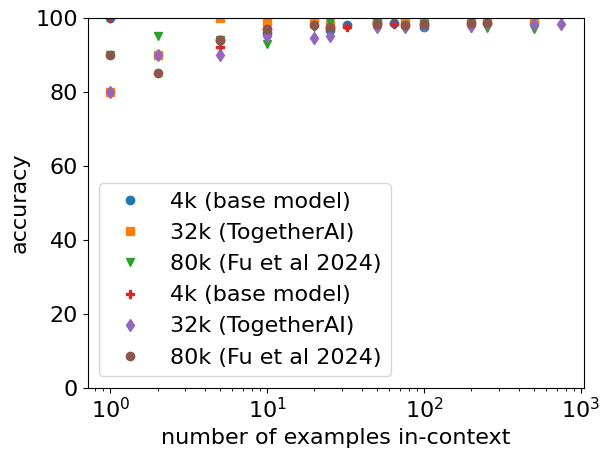

In [42]:
model = '80k'
dataset = banking_cheating
dataset2 = clinic_cheating
plot_lines([
    ('4k (base model)', dataset['llama']),
    ('32k (TogetherAI)', dataset['32k']),
    ('80k (Fu et al 2024)', dataset['80k']),
    ('4k (base model)', dataset2['llama']),
    ('32k (TogetherAI)', dataset2['32k']),
    ('80k (Fu et al 2024)', dataset2['80k']),
    #('Mistral (32k)', dataset['mistral'])
    ], f"Llama-2-7b variants on Banking-77") #, save="placeholder-figs/banking-perf.png")

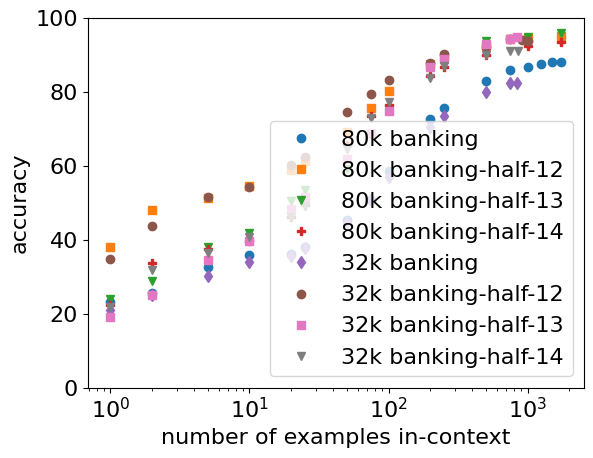

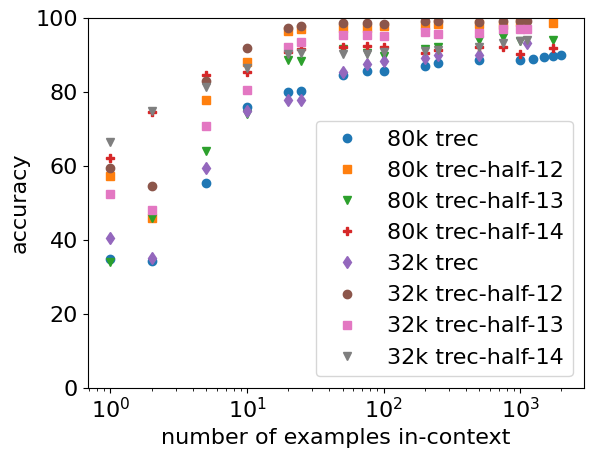

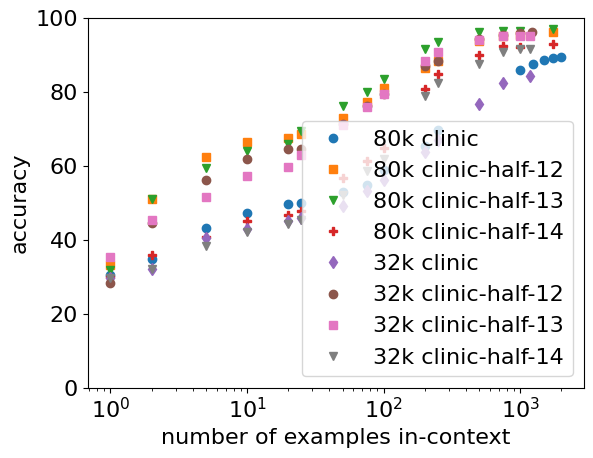

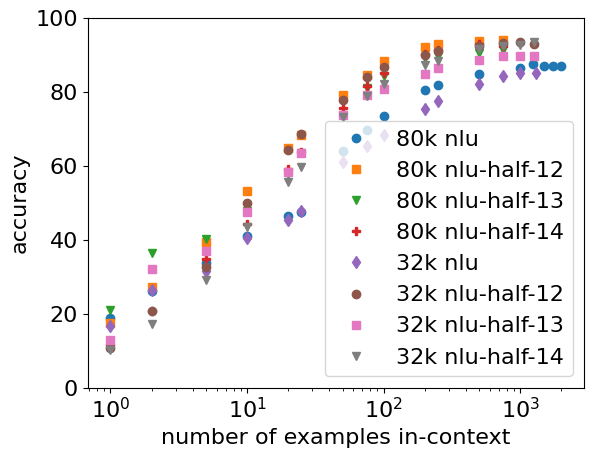

'\nplot_lines([\n    (\'trec\', trecfine[model]),\n    (\'trec-half-12\', trecfine_half_12[model]),\n    (\'trec-half-13\', trecfine_half_13[model]),\n    (\'trec-half-14\', trecfine_half_14[model]),\n    ], f"{model} trecfine runs")\n'

In [43]:
model = '80k'
model2 = '32k'
plot_lines([
    (f'{model} banking', banking[model]),
    (f'{model} banking-half-12', banking_half_12[model]),
    (f'{model} banking-half-13', banking_half_13[model]),
    (f'{model} banking-half-14', banking_half_14[model]),
    (f'{model2} banking', banking[model2]),
    (f'{model2} banking-half-12', banking_half_12[model2]),
    (f'{model2} banking-half-13', banking_half_13[model2]),
    (f'{model2} banking-half-14', banking_half_14[model2]),
    ], f"{model} and {model2} banking runs")

plot_lines([
    (f'{model} trec', trec[model]),
    (f'{model} trec-half-12', trec_half_12[model]),
    (f'{model} trec-half-13', trec_half_13[model]),
    (f'{model} trec-half-14', trec_half_14[model]),
    (f'{model2} trec', trec[model2]),
    (f'{model2} trec-half-12', trec_half_12[model2]),
    (f'{model2} trec-half-13', trec_half_13[model2]),
    (f'{model2} trec-half-14', trec_half_14[model2]),
    ], f"{model} and {model2} trec runs")


plot_lines([
    (f'{model} clinic', clinic[model]),
    (f'{model} clinic-half-12', clinic_half_12[model]),
    (f'{model} clinic-half-13', clinic_half_13[model]),
    (f'{model} clinic-half-14', clinic_half_14[model]),
    (f'{model2} clinic', clinic[model2]),
    (f'{model2} clinic-half-12', clinic_half_12[model2]),
    (f'{model2} clinic-half-13', clinic_half_13[model2]),
    (f'{model2} clinic-half-14', clinic_half_14[model2]),
    ], f"{model} and {model2} clinic runs")

plot_lines([
    (f'{model} nlu', nlu[model]),
    (f'{model} nlu-half-12', nlu_half_12[model]),
    (f'{model} nlu-half-13', nlu_half_13[model]),
    (f'{model} nlu-half-14', nlu_half_14[model]),
    (f'{model2} nlu', nlu[model2]),
    (f'{model2} nlu-half-12', nlu_half_12[model2]),
    (f'{model2} nlu-half-13', nlu_half_13[model2]),
    (f'{model2} nlu-half-14', nlu_half_14[model2]),
    ], f"{model} and {model2} nlu runs")


"""
plot_lines([
    ('trec', trecfine[model]),
    ('trec-half-12', trecfine_half_12[model]),
    ('trec-half-13', trecfine_half_13[model]),
    ('trec-half-14', trecfine_half_14[model]),
    ], f"{model} trecfine runs")
"""

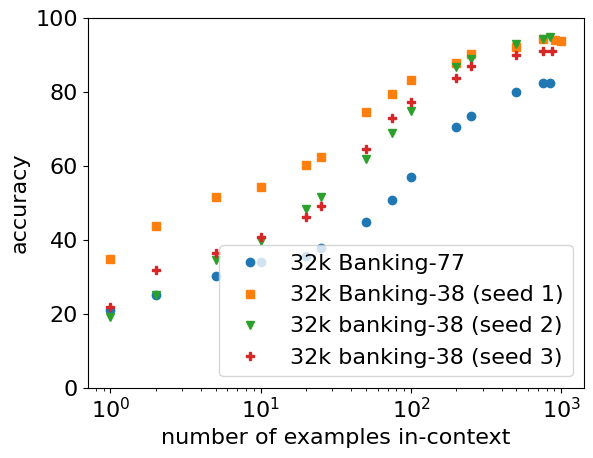

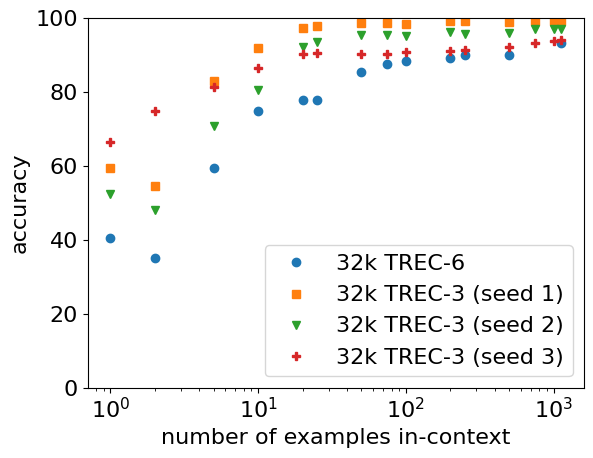

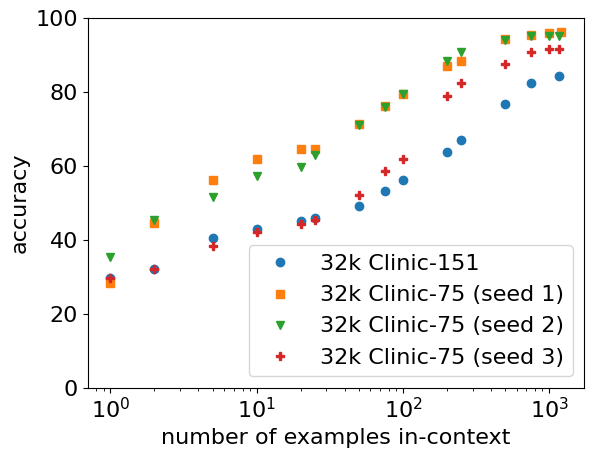

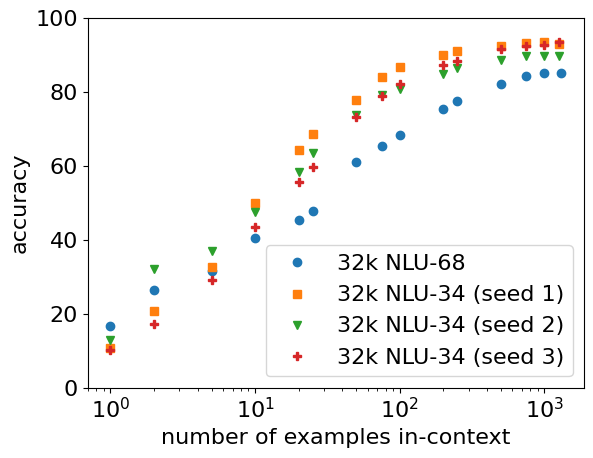

'\nplot_lines([\n    (\'trec\', trecfine[model]),\n    (\'trec-half-12\', trecfine_half_12[model]),\n    (\'trec-half-13\', trecfine_half_13[model]),\n    (\'trec-half-14\', trecfine_half_14[model]),\n    ], f"{model} trecfine runs")\n'

In [44]:
model = '32k'
plot_lines([
    (f'{model} Banking-77', banking[model]),
    (f'{model} Banking-38 (seed 1)', banking_half_12[model]),
    (f'{model} banking-38 (seed 2)', banking_half_13[model]),
    (f'{model} banking-38 (seed 3)', banking_half_14[model]),
    ], f"{model} model: Banking runs with full/half label space", save="placeholder-figs/half-labels/banking.png")

plot_lines([
    (f'{model} TREC-6', trec[model]),
    (f'{model} TREC-3 (seed 1)', trec_half_12[model]),
    (f'{model} TREC-3 (seed 2)', trec_half_13[model]),
    (f'{model} TREC-3 (seed 3)', trec_half_14[model]),
    ], f"{model} model: TREC runs with full/half label space", save="placeholder-figs/half-labels/trec.png")

plot_lines([
    (f'{model} Clinic-151', clinic[model]),
    (f'{model} Clinic-75 (seed 1)', clinic_half_12[model]),
    (f'{model} Clinic-75 (seed 2)', clinic_half_13[model]),
    (f'{model} Clinic-75 (seed 3)', clinic_half_14[model]),
    ], f"{model} model: Clinic runs with full/half label space", save="placeholder-figs/half-labels/clinic.png")

plot_lines([
    (f'{model} NLU-68', nlu[model]),
    (f'{model} NLU-34 (seed 1)', nlu_half_12[model]),
    (f'{model} NLU-34 (seed 2)', nlu_half_13[model]),
    (f'{model} NLU-34 (seed 3)', nlu_half_14[model]),
    ], f"{model} model: NLU runs with full/half label space", save="placeholder-figs/half-labels/nlu.png")


"""
plot_lines([
    ('trec', trecfine[model]),
    ('trec-half-12', trecfine_half_12[model]),
    ('trec-half-13', trecfine_half_13[model]),
    ('trec-half-14', trecfine_half_14[model]),
    ], f"{model} trecfine runs")
"""